<br>

<center> <strong> <font face="Courier New" size=5> Reinforcement Learning </font> </strong> </center>
<br>
<center>  <strong> <font face="Courier New" size=6 color='#2E86C1'> Programación Dinámica - Taller 2</font> </strong> </center>

<br>
<center> <p> Docente: Fernando Enrique Lozano Martinez </p>
 <p> 
 Estudiantes: <br>
 Manuela Viviana Chacón Chamorro <br>
 Juan Ivan Cubillos Garay </p>
</center>

<br> 
<p> IELE <br> 
Facultad de Ingeniería <br>
Universidad de los Andes <br>
2023
</p>

---

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Semilla para los aleatorios 
np.random.seed(202303) 

# Modelamiento del juego MDP



<p align="justify">
En el juego de escaleras y serpientes planteado en la siguiente figura se considera un tablero de 100 posiciones. En cada posición el jugador debe decidir si desea avanzar o retroceder, a continuación se lanza un dado y se avanza o retrocede el número de casillas indicadas por el dado. La meta del jugador es ganar la partida, esto ocurre cuando se llega a una de las casillas marcadas con el emoticon azul. Además, el agente debe evitar perder evadiendo las casillas marcadas con emoticones rojos. Si el agente cae en la cabeza de una serpiente será enviado al estado señalado por la cola de esa serpiente, en el caso que el agente quede en el estado de la base de una escalera será transportado a la cima de esa escalera. Otro aspecto importante a considerar en la dinámica del juego son los rebotes, cuando el agente supere el límite de los estados bordes (100) o (1) se rebota avanzando en la dirección contraria. 

<center>
<div>
<img src="https://drive.google.com/uc?export=view&id=1eXbLYbNaNxlWGkTVij0QKZvff3h7yKvi" width="500"/>
</div>
</center>


## Definición de estados 

Los estados para este juego serán las posiciones del tablero.

$$S^+ = \{s | \ s \in \mathbb{Z}, 1 \leq s \leq 100\}$$

La notación $S^+$ indica que este conjunto también contiene a los estados finales, los cuales son las posiciones donde están los emoticones azules o rojos.



## Definición de recompensas

Se considera que las recompensas para el juego pueden ser $R = \{1, -1, 0\}$. La recompensa $1$ se dará cuando el agente llegue a la casilla de ganar, $-1$ en la casilla perder y 0 en cualquier otro estado del tablero. 

## Acciones

Las acciones serán **Avanzar** o **Retroceder**, se debe definir tan pronto se llegue al estado e indicarán si se avanza o retrocede el número de casillas definidas por el dado.

## Probabilidades de transición 

Inicialmente se define la probabilidad de transición $p(s'|s,a)$, sin tener en cuenta el efecto de las serpientes, las escaleras o los rebotes, de la siguiente manera:

$$p(s' | s, a) : 100 \times 100 \times 2 \to [0,1]$$



*  Acción avanzar $a = A$,  $p(s' | s, \text{A})$,   $\forall s, s' \in S^+$:

   $p(s' | s, A) = 1/6$, si   $\ s+1 \leq s' \leq s+6$

   $p(s' | s, A) = 0$, si   $s' \leq s \text{ o } s' > s+6 $

*  Acción retroceder $a = \text{R}$,  $ p(s' | s, \text{R})$,  $\forall s, s' \in S^+$:

   $p(s' | s, \text{R}) = 1/6$, si   $\ s-6 \leq s' \leq s-1$

   $p(s' | s, \text{R}) = 0$, si   $s' \geq s \text{ o } s' < s-6 $




## Efecto serpientes

Las serpientes se agregaran teniendo en cuenta que para el estado que corresponda a una cabeza de serpiente el agente se lleva al estado de la cola de la serpiente. Entonces los estados que tengan posibilidad de llegar al estado donde está la cabeza de serpiente deben incluir la probabilidad de ir al estado de la cola. La notación $(\text{head}, \text{tail}) \in S \times S$ indica parejas de estados donde *head* corresponde a la cabeza de la serpiente y *tail* a su cola. 


  * Acción avanzar $a = A$, $p(s' | s, \text{A})$,   $\forall s, s' \in S^+$, $\forall (\text{head}, \text{tail}) \in S^+ \times S^+ | \ \text{head} = \text{Estado cabeza de serpiente}, \text{tail} = \text{Estado cola de serpiente}$:

  $p(\text{tail} | s, \text{A}) = 1/6, \ \forall s \ | \ \text{head} - 6 \leq s \leq \text{head} - 1 $

  * Acción retroceder $a = R$, $p(s' | s, \text{R})$,   $\forall s, s' \in S^+$, $\forall (\text{head}, \text{tail}) \in S^+ \times S^+ | \ \text{head} = \text{Estado cabeza de serpiente}, \text{tail} = \text{Estado cola de serpiente}$:

  $p(\text{tail} | s, \text{A}) = 1/6, \ \forall s \ | \ \text{head} + 1 \leq s \leq \text{head} + 6 $


Al realizar esta actualización de probabilidades también se debe considerar eliminar la probabilidad de llegar al estado de la cabeza de serpiente, ya que esta fue reemplazada por la probabilidad de llegar al estado de su cola. Tan pronto el jugador alcance el estado de la cabeza de serpiente se transporta a la cola, por lo tanto es como si los estados de cabeza de serpiente no existieran. No hay forma que luego de una jugada se quede en el estado de la cabeza, por eso se propone eliminar probabilísticamente estos estados de manera que todas sus probabilidades de llegada o salida sean nulas.

  $p(\text{head} | s, \text{A}) = 0, \ \forall s \in S^+ , \forall \text{ head} \in \text{Cabezas de serpientes}$

  $p( s | \text{head}, \text{A}) = 0, \ \forall s \in S^+ , \forall \text{ head} \in \text{Cabezas de serpientes}$

## Efecto escaleras

Similar al caso de las serpientes el efecto de las escaleras gregaran teniendo en cuenta que para el estado que corresponda a la base de una escalera el agente se lleva al estado de cima de esa escalera. Entonces los estados que tengan posibilidad de llegar al estado donde está base de escalera deben incluir la probabilidad de ir al estado de la cima. La notación $(\text{floor}, \text{ceil}) \in S \times S$ indica parejas de estados donde *florr* corresponde a la base de la escalera y *ceil* a su cima.


 * Acción avanzar $a = A$, $p(s' | s, \text{A})$,   $\forall s, s' \in S^+$, $\forall (\text{floor}, \text{ceil}) \in S^+ \times S^+ | \ \text{floor} = \text{Base de escalera}, \text{ceil} = \text{Cima de escalera}$:

  $p(\text{ceil} | s, \text{A}) = 1/6, \ \forall s \ | \ \text{floor} - 6 \leq s \leq \text{floor} - 1 $

* Acción retroceder $a = R$, $p(s' | s, \text{R})$,   $\forall s, s' \in S^+$, $\forall (\text{floor}, \text{ceil}) \in S^+ \times S^+ | \ \text{floor} = \text{Base de escalera}, \text{ceil} = \text{Cima de escalera}$:

  $p(\text{ceil} | s, \text{R}) = 1/6, \ \forall s \ | \ \text{floor} + 1 \leq s \leq \text{floor} + 6 $

Al realizar esta actualización de probabilides tambien se debe considerar eliminar la probabilidad de llegar al estado de la base de la escalera, ya que esta fue remplazada por la probabilidad de llegar al estado de su cima. Tan pronto el jugador alcance el estado de la base de la escalera se trasnporta a la cima, por lo tanto es como si los estados de base de la escalera no existieran. No hay forma que luego de una jugada se quede en el estado de la base, por eso se propone eliminar probabilisticamente estos estados de manera que todas sus probabilidades de llegada o salida sean nulas. 

  $p(\text{floor} | s, \text{A}) = 0, \ \forall s \in S^+ , \forall \text{ floor} \in \text{Base de escalera}$

  $p( s | \text{floor}, \text{A}) = 0, \ \forall s \in S^+ , \forall \text{ floor} \in \text{Base de escalera}$


## Efecto rebote superior considerando serpientes
<p align="justify">
El rebote superior sólo puede ocurrir cuando se avanza desde el estado 95. Sin embargo para los estados 95 y 98 no se deben de considerar actualización ya que estos estados son cabezas de serpientes, como ya se estableció no hay forma de que en alguna jugada el jugador quede ahí. De manera que no es necesario actualizar las probabilidades. Las demás probabilidades en la acción avanzar cambian o deben actualizarse de acuerdo con la siguiente tabla:

| Estado $s$ | Estado $s'$ | Proabilidades $p$ |
| ------ | -------- | ------ |
| 96   | 28, 99    | 1/3   |
| 97  | 97  | 1/6   |
| 97  | 28, 99  | 1/3   |
| 99  | 24, 96, 97, 28, 99 | 1/6   |  
| 100  | 94, 24, 96, 97, 28, 99 | 1/6   | 
</p>

## Efecto rebote inferior 
<p align="justify">
El rebote inferior ocurre cuando se retrocede desde la posición 5, en este caso las probabilidades deben actualizarse de acuerdo con la siguiente tabla:


| Estado $s$ | Estado $s'$ | Proabilidades $p$ |
| ------ | -------- | ------ |
| 6   | 2    | 1/3   |
| 5   | 2,3    | 1/3   |
| 4   | 4    | 1/6   |
| 4   | 2,3    | 1/3   |
| 3   | 2    | 1/3   |
| 3   | 3, 4, 5    | 1/6   |
| 2   | 2, 3, 4, 5, 6    | 1/6   |
| 1   | 2, 3, 4, 5, 6, 7    | 1/6   |   

A continuación se realiza la implementación de las probabilidades de transición como se detallaron en esta sección.

----

## Implementación computacional

In [ ]:
def parametersBoard(indexRewardWin, indexRewardLoss):
    # Esta función inicializa el tablero y los elementos del MDP
    # Parámetros 
    # indexRewardWin = lista con los estados en los cuales el jugador gana
    # indexRewardLoss = lista con los estados en los cuales el jugador pierde

    # Retorna
    # boardState = lista de estados
    # rewardBoard = lista de recompensas observadas para cada estado rewardBoard[state - 1]
    # rewards = Conjunto de recompensas
    # actionAvailable = acciones disponibles
    # gameOver lista que indica si el juego ha sido finalizado 
    # headSnakes = estados con cabeza de serpiente
    # tailSnakes = estados con colas de serpientes
    # floorLadders = estados con bases de escaleras
    # ceilLadders = estados con cimas de escaleras 

    
    boardState = range(1,101) # Inicialización tablero de estados 
    actionAvailable = ['A', 'R'] # Acciones disponibles A = avanzar, R = retroceder
    
    rewards = [1, -1, 0] # Conjunto de recompensas

    # Creacion tablero de recompensas 
    rewardBoard = np.zeros((100,)) 
    for i in indexRewardWin: rewardBoard[i-1] = 1
    for j in indexRewardLoss: rewardBoard[j-1] = -1
    
    # Creacion lista de verificación si el juego ha terminado 
    gameOver = [True if reward != 0 else False for i, reward in enumerate(rewardBoard) ]
    
    # Posiciones serpientes
    headSnakes = [44, 46, 48, 52, 55, 59, 64, 69, 73, 83, 92, 95, 98]
    tailSnakes =  [22, 5, 9, 11, 7, 17, 36, 33, 1, 19, 51, 24, 28]

    # Posiciones escaleras  
    floorLadders = [8, 21, 43, 50, 54, 62, 66, 80]
    ceilLadders = [26, 82, 77, 91, 93, 96, 87, 100]

    return boardState, rewardBoard, rewards, actionAvailable, gameOver, headSnakes, tailSnakes, floorLadders, ceilLadders

Para comenzar se inicializa el tablero, esta acción se realiza con la función 

```
parametersBoard(indexRewardWin, indexRewardLoss)
```
Esta función retornara los elementos más importantes para la formulación del MDP.


In [ ]:
indexRewardWin = [80, 100]
indexRewardLoss = [23, 37, 45, 67, 89]

boardState, rewardBoard, rewards, actionAvailable, gameOver, headSnakes, tailSnakes, floorLadders, ceilLadders  = parametersBoard(indexRewardWin, indexRewardLoss)

Después de iniciar el tablero de juego y sus elementos se realiza el llamado a las funciones que calculan las probabilidades de transición de acuerdo con lo detallado en el inicio de esta sección. Las siguientes funciones realizan el cálculo de la probabilidades iniciando con el análisis simple, incluyendo serpientes, escaleras y rebotes.

In [ ]:
def transitionProbabilitiesSimple(boardState, actionAvailable, probabilitiesTransition):
    # Esta función calcula las probabilidades de transición sin tener en cuenta rebotes, serpientes o escaleras
    # Parámetros 
    # boardState = lista de estados
    # actionAvailable = lista de acciones posibles
    # probabilitiesTransition = diccionario indexado con tuplas (s', s, a) o diccionario vacio

    # Retorna 
    # probabilitiesTransition = diccionario indexado con tuplas (s', s, a) para todos los estados y todas las acciones
    
    for action in actionAvailable:
        if action == 'A':
            for state in boardState:
                for state_new in boardState:
                    if state + 1 <= state_new <= state + 6:
                        probabilitiesTransition[(state_new, state, action)] = 1/6 
                    else:
                        probabilitiesTransition[(state_new, state, action)] = 0

        if action == 'R':
            for state in boardState:
                    for state_new in boardState:
                        if state - 6 <= state_new <= state -1:
                            probabilitiesTransition[(state_new, state, action)] = 1/6 
                        else:
                            probabilitiesTransition[(state_new, state, action)] = 0
    return probabilitiesTransition

In [ ]:
def transitionProbabilitiesSnake(boardState, actionAvailable, probabilitiesTransition, headSnakes, tailSnakes):
    # Esta función modifica las probabilidades de transición incluyendo serpientes
    # Parámetros 
    # boardState = lista de estados
    # actionAvailable = lista de acciones posibles
    # probabilitiesTransition = diccionario indexado con tuplas (s', s, a) o diccionario vacio
    # headSnakes = posiciones cabezas serpientes
    # tailSnakes = posiciones colas serpientes

    # Retorna 
    # probabilitiesTransition = modiciacion del diccionario indexado con tuplas (s', s, a)
    # para todos los estados y todas las acciones incluyendo serpientes 
    
    for headSnake, tailSnake in zip(headSnakes, tailSnakes):
        for action in actionAvailable:

            if action == 'A':
                startState = headSnake - 6
                endState = headSnake  - 1 

                if  startState < 1: startState = 1
                if endState > 100: endState = 100
                
                for state in range(startState, endState + 1):
                    probabilitiesTransition[(tailSnake, state, action)] = 1/6

            if  action == 'R':
                startState = headSnake + 1
                endState = headSnake + 6
                
                if  startState < 1: startState = 1
                if endState > 100: endState = 100
                
                for state in range(startState, endState  + 1):
                    probabilitiesTransition[(tailSnake, state, action)] = 1/6
              
    return probabilitiesTransition

In [ ]:
def transitionProbabilitiesLadder(boardState, actionAvailable, probabilitiesTransition, floorLadders, ceilLadders):
    # Esta función modifica las probabilidades de transición incluyendo escaleras
    # Parámetros 
    # boardState = lista de estados
    # actionAvailable = lista de acciones posibles
    # probabilitiesTransition = diccionario indexado con tuplas (s', s, a) o diccionario vacio
    # floorLadders = posiciones bases de escaleras 
    # ceilLadders = posiciones cimas de escaleras

    # Retorna 
    # probabilitiesTransition = modiciacion del diccionario indexado con tuplas (s', s, a)
    # para todos los estados y todas las acciones incluyendo escaleras 
    for floorLadder, ceilLadder in zip(floorLadders, ceilLadders):
        for action in actionAvailable:
        
            if action == 'A':
                startState = floorLadder - 6
                endState = floorLadder  - 1 
                if  startState < 1: startState = 1
                if endState > 100: endState = 100
                for state in range(startState, endState + 1):
                    probabilitiesTransition[(ceilLadder, state, action)] = 1/6

            if  action == 'R':
                startState = floorLadder + 1
                endState = floorLadder + 6
                if  startState < 1: startState = 1
                if endState > 100: endState = 100
                for state in range(startState, endState  + 1):
                    probabilitiesTransition[(ceilLadder, state, action)] = 1/6
        
    return probabilitiesTransition

In [ ]:
def trasitiionProbabilitiesDelete(floorLadders, headSnakes, actionAvailable, probabilitiesTransition):
  for floorLadder in floorLadders:
      for action in actionAvailable:
          for state in boardState:
              probabilitiesTransition[(state, floorLadder, action)] = 0
              probabilitiesTransition[(floorLadder, state, action)] = 0
  for headSnake in headSnakes:
      for action in actionAvailable:
          for state in boardState:
              probabilitiesTransition[(state, headSnake, action)] = 0
              probabilitiesTransition[(headSnake, state, action)] = 0
  for win in indexRewardWin:
    for action in actionAvailable:
          for state in boardState:
              probabilitiesTransition[(state, win, action)] = 0
  for loss in indexRewardLoss:
    for action in actionAvailable:
          for state in boardState:
              probabilitiesTransition[(state, loss, action)] = 0
  return probabilitiesTransition

In [ ]:
def transitionProbilitiesRebound(probabilitiesTransition):
    # Esta función modifica las probabilidades de transición incluyendo rebotes
    # probabilitiesTransition = diccionario indexado con tuplas (s', s, a) 

    # Retorna 
    # probabilitiesTransition = modiciacion del diccionario indexado con tuplas (s', s, a)
    # para todos los estados y todas las acciones incluyendo rebotes

    # Rebote superior 
    action = 'A'

    probabilitiesTransition[(28, 96, action)] = 1/3 #Cabeza de serpiente en 95
    probabilitiesTransition[(99, 96, action)] = 1/3

    probabilitiesTransition[(97, 97, action)] = 1/6
    probabilitiesTransition[(28, 97, action)] = 1/3 # Cabeza de una serpiente en 98
    probabilitiesTransition[(99, 97, action)] = 1/3

    probabilitiesTransition[(24, 99, action)] = 1/6 # Cabeza de serpiente en 95
    probabilitiesTransition[(96, 99, action)] = 1/6
    probabilitiesTransition[(97, 99, action)] = 1/6
    probabilitiesTransition[(28, 99, action)] = 1/6 # Cabeza de serpiente en 98
    probabilitiesTransition[(99, 99, action)] = 1/6

    probabilitiesTransition[(94, 100, action)] = 1/6 
    probabilitiesTransition[(24, 100, action)] = 1/6 # Cabeza de serpiente en 95
    probabilitiesTransition[(96, 100, action)] = 1/6
    probabilitiesTransition[(97, 100, action)] = 1/6
    probabilitiesTransition[(28, 100, action)] = 1/6 # Cabeza de serpiente en 98
    probabilitiesTransition[(99, 100, action)] = 1/6 
    
    # Rebote inferior 
    action = 'R'

    probabilitiesTransition[(2, 6, action)] = 1/3

    probabilitiesTransition[(2, 5, action)] = 1/3
    probabilitiesTransition[(3, 5, action)] = 1/3

    probabilitiesTransition[(4, 4, action)] = 1/6
    probabilitiesTransition[(3, 4, action)] = 1/3
    probabilitiesTransition[(2, 4, action)] = 1/3

    probabilitiesTransition[(2, 3, action)] = 1/3
    probabilitiesTransition[(3, 3, action)] = 1/6
    probabilitiesTransition[(4, 3, action)] = 1/6
    probabilitiesTransition[(5, 3, action)] = 1/6

    probabilitiesTransition[(2, 2, action)] = 1/6
    probabilitiesTransition[(3, 2, action)] = 1/6
    probabilitiesTransition[(4, 2, action)] = 1/6
    probabilitiesTransition[(5, 2, action)] = 1/6
    probabilitiesTransition[(6, 2, action)] = 1/6

    probabilitiesTransition[(2, 1, action)] = 1/6
    probabilitiesTransition[(3, 1, action)] = 1/6
    probabilitiesTransition[(4, 1, action)] = 1/6
    probabilitiesTransition[(5, 1, action)] = 1/6
    probabilitiesTransition[(6, 1, action)] = 1/6
    probabilitiesTransition[(7, 1, action)] = 1/6
    
    return probabilitiesTransition

In [ ]:
def transitionProbilities(boardState, actionAvailable):
    # Esta función retorna las probabilidades de transición incluyendo rebotes, serpientes y escaleras
    # Parámetros 
    # boardState = lista de estados
    # actionAvailable = lista de acciones disponibles 

    # Retorna 
    # probabilitiesTransition = probabilidades de transición incluyendo rebotes, serpientes y escaleras
    # indexado con tuplas (s', s, a) para todos los estados y todas las acciones 
    

    probabilitiesTransition = {}
    probabilitiesTransition = transitionProbabilitiesSimple(boardState, actionAvailable, probabilitiesTransition)
    probabilitiesTransition = transitionProbabilitiesSnake(boardState, actionAvailable, probabilitiesTransition,  headSnakes, tailSnakes)
    probabilitiesTransition = transitionProbabilitiesLadder(boardState, actionAvailable, probabilitiesTransition, floorLadders, ceilLadders)
    probabilitiesTransition = trasitiionProbabilitiesDelete(floorLadders, headSnakes, actionAvailable, probabilitiesTransition)
    return transitionProbilitiesRebound(probabilitiesTransition)

In [ ]:
probabilitiesTransition = transitionProbilities(boardState, actionAvailable)

## Probabilidades MDP $p(s',r | s, a)$

<p align="justify">
En el juego la recompensa es de carácter determinístico, de manera que cada estado $s$ tiene asociada una recompensa fija $r$. Entonces,

$p(s',r | s, a) = p(s'| s, a)$, si $r = R(s)$, con $R(s)$ la recompensa asignada para el estado $s$. 

$p(s',r | s, a) = 0 $, si $r \not = R(s)$, con $R(s)$ la recompensa asignada para el estado $s$.

Teniendo esto en cuenta se construyen las probabilidades MPD en la siguiente función.

In [ ]:
def probabilitiesMDP(boardState, actionAvailable, rewardBoard, probabilitiesTransition):
    # Función que calcula las probabilidades MDP para el juego de serpientes y escaleras propuesto
    # Parámetros 
    # Parámetros 
    # boardState = lista de estados
    # actionAvailable = lista de acciones disponibles 
    # rewardBoard = lista de recompensas asociada al estado
    # probabilitiesTransition = diccionario de las probabilidades de transición 

    # Retorna
    # probabilitiesMDP = diccionario indexado con la tupla (s',r,s,a)

    probabilitiesMDP = {}
    for action in actionAvailable:
        for state in boardState:
            for state_new in boardState: 
                 for reward in rewards:
                    if reward == rewardBoard[state_new-1]:
                        probabilitiesMDP[(state_new, reward, state, action)] = probabilitiesTransition[(state_new, state, action)] 
                    else:
                        probabilitiesMDP[(state_new, reward, state, action)] = 0
    return probabilitiesMDP

In [ ]:
probabilitiesMDP = probabilitiesMDP(boardState, actionAvailable, rewardBoard, probabilitiesTransition)

## Visualización probabilidades MDP

<p align="justify">
Para realizar una visualización de las probabilidades del MDP se propone presentar en una matriz de color los estados $s, s'$ fijando la acción para las probabilidades de transición. Dado que las probabilidades del MDP $p(s', r | s, a)$ tienen 0 en los pares $(s',r)$ en los cuales no se observa la recompensa determinista $r$ asignada al estado $s'$ entonces es suficiente con visualizar la probabilidad de transición.

### Probabilidades de transición acción avanzar 

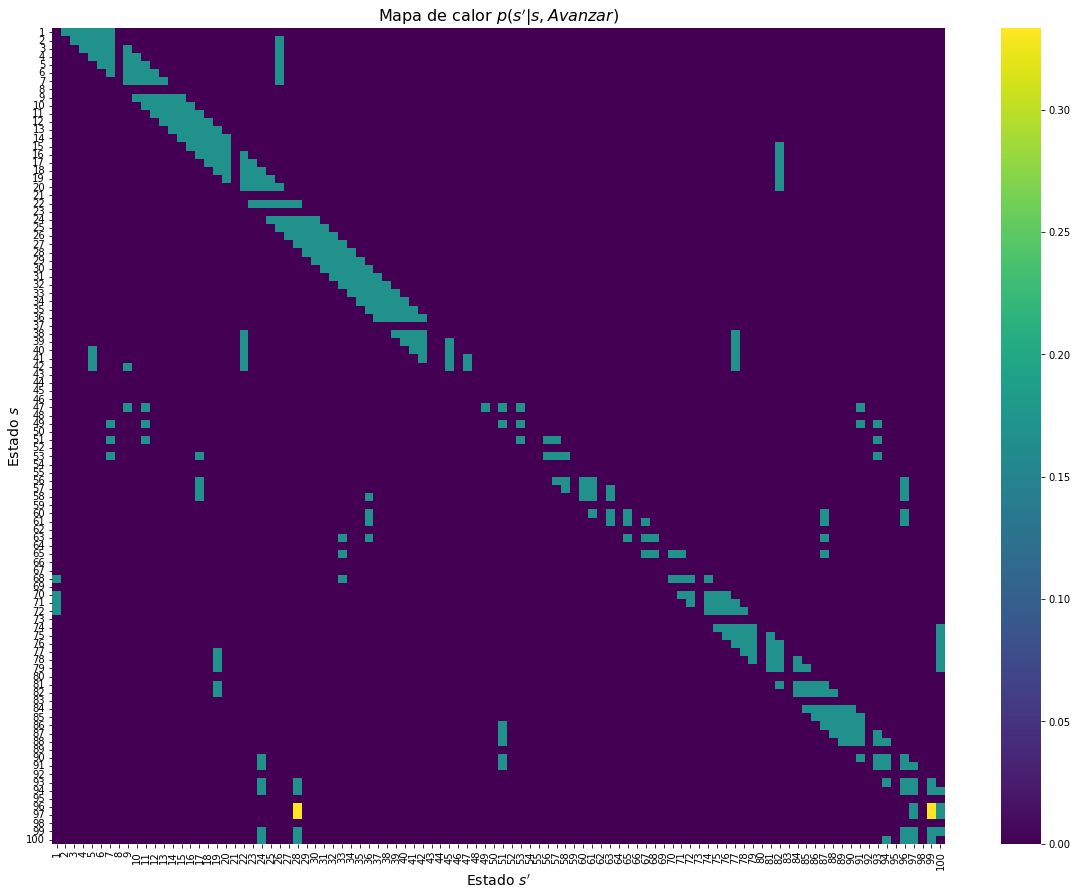

In [ ]:
action = 'A'
matrizprobabilitiesTransitionA = np.zeros((100,100))
for state in boardState:
  for stateNew in boardState:
      matrizprobabilitiesTransitionA[state-1][stateNew-1] = probabilitiesTransition[(stateNew, state, 'A')]

plt.figure(figsize=(20,15))
sns.heatmap(matrizprobabilitiesTransitionA, cmap= 'viridis',
            xticklabels=boardState, yticklabels=boardState)
plt.title("Mapa de calor $p(s'| s, Avanzar)$", fontsize = 16)
plt.xlabel("Estado $s'$", fontsize = 14)
plt.ylabel("Estado $s$", fontsize = 14)
plt.show()

### Probabilidades de transición acción retroceder 

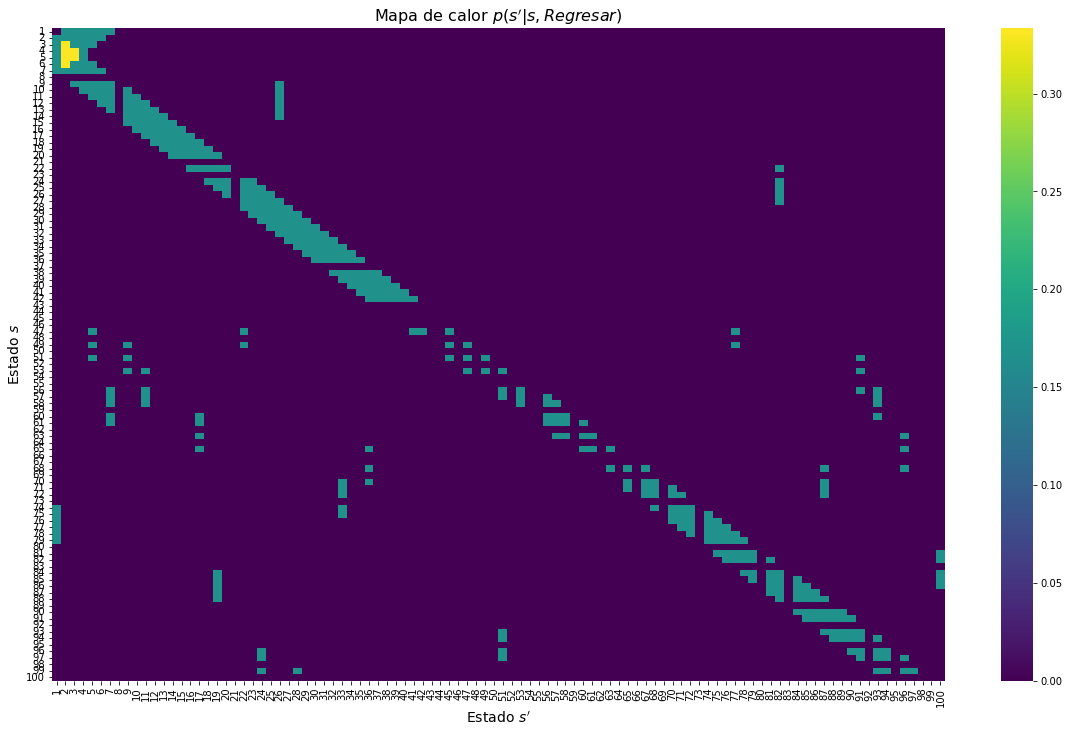

In [ ]:
action = 'R'
matrizprobabilitiesTransitionR = np.zeros((100,100))
for state in boardState:
  for stateNew in boardState:
      matrizprobabilitiesTransitionR[state-1][stateNew-1] = probabilitiesTransition[(stateNew, state, action)]

plt.figure(figsize=(20,12))
sns.heatmap(matrizprobabilitiesTransitionR, cmap= 'viridis',
             xticklabels=boardState, yticklabels=boardState)

plt.title("Mapa de calor $p(s'| s, Regresar)$", fontsize = 16)
plt.xlabel("Estado $s'$", fontsize = 14)
plt.ylabel("Estado $s$", fontsize = 14)
plt.show()

También se comprueba que las probabilidades relacionadas con los estados que corresponden a las cabezas de las serpientes sean nulas, igual para los estados relacionados con la base de las escaleras. 

In [ ]:
for head in headSnakes:
  for action in actionAvailable:
    for state in boardState:
        p = probabilitiesTransition[(state, head, action)]
        if  p != 0:
            print(f'{state} : {p}' )
        p = probabilitiesTransition[(head, state, action)]
        if  p != 0:
            print(f'{state} : {p}' )

In [ ]:
for floor in floorLadders:
  for action in actionAvailable:
    for state in boardState:
        p = probabilitiesTransition[(state, floor, action)]
        if  p != 0:
            print(f'{state} : {p}' )
        p = probabilitiesTransition[(floor, state, action)]
        if  p != 0:
            print(f'{state} : {p}' )

# Evaluación de política 

<p align="justify">
El objetivo de la evaluación de la política es encontrar el valor de la función $v_{\pi}(s)$ para todos los estados dada una política determinada $\pi$ y un factor de descuento $\gamma$. La función de valor $v_{\pi}(s)$ indica que tan deseable es el estado $s$ en términos del retorno esperado siguiendo la política $\pi$. Para encontrar el valor de $v\pi(s)$ se pueden resolver las ecuaciones de la forma:

$$v_{\pi }\left(s\right)=\sum _a\pi \left(a|s\right)\sum _{s'}\sum _r\left(p\left(s',r|s,a\right)\left[r+\gamma v_{\pi }\left(s'\right)\right]\right),\ \forall s\in S
$$
<p align="justify">
Sin embargo, resolver este sistema de ecuaciones puede ser computacionalmente costoso, entonces se plantea usar programación dinámica para resolver iterativamente el problema, en este caso las ecuaciones se convierten en asignaciones y tiene la forma:

$$V_{i+1}\left(s\right) ← \sum _a\pi \left(a|s\right)\sum _{s'}\sum _r\left(p\left(s',r|s,a\right)\left[r+\gamma V_{i }\left(s'\right)\right]\right),\ \forall s\in S
$$

<p align="justify">
Al tener escenarios con recompensa determinística se estableció que $p(s', r| s,a) = p(s'| s,a)$ si la recompensa $r = R(s)$ es igual a la recompensa observada en ese estado y $0$ en cualquier otro caso, entonces para este caso específico las ecuaciones anteriores se modifican por:

$$V_{i+1}\left(s\right) ← \sum _a\pi \left(a|s\right)\sum _{s'}\sum _r\left(p\left(s'|s,a\right)\left[r+\gamma V_{i }\left(s'\right)\right]\right),\ \forall s\in S
$$

<p align="justify">
Para determinar si el algoritmo converge de manera que la actualización iterativa llegue a valores de $V(s)$ que sean lo más cercanos a $v(s)$ entonces se incluye el parámetro $\delta$ que mide en cada iteración el máximo error entre el valor actual y el valor siguiente de $V(s)$ para todos los estados. Este valor al ser menor que algún $\epsilon$, valor positivo arbitrariamente pequeño, indicará que el algoritmo converge.



A continuación se implementa una función que realiza la evaluación de política en el caso de políticas determinísticas, esto lo realiza a través de programación dinámica.

---

In [ ]:
def evaluationPolicy(rewardBoard, boardState, headSnakes, floorLadders, gamma, probabilitiesTransition, epsilon, policy):
    # Función que cálcula la función de valor v(s) para una política 
    # Parámetros
    # rewardBoard = recompensas para cada estado
    # boardState = lista de estados 
    # headSnakes = estados con cabezas de serpientes
    # floorLadders = estados con bases de escaleras
    # gamma = Factor de descuento 
    # probabilitiesTransition diccionario con las probabilidades de transición
    # policy = diccionario con la política para cada estado 

    # Retorna 
    # values = Función de valor de la politica para cada estado
    # sigma = Error final proceso 
    # sigmas = Errores en cada iteración max(sigma, |v - V(s)|)
    
    values = dict.fromkeys(boardState , 0.0) # Diccionario con valores de v(s) en función del estado 
    sigmas = [] # Errores máximos de estimación en cada iteración 

    # Inicia ciclo de programación dinámica
    while True:
        newValues = dict.fromkeys(boardState , 0.0)
        sigma = 0
        for state in boardState:
            doneFlag = gameOver[state-1]
            if doneFlag or state in floorLadders or state in headSnakes: newValues[state] = 0
            else:
                valueActions = []
                for action in actionAvailable:
                    valueAction = 0
                    if action == policy[state]: probabilityPolicy = 1
                    else: probabilityPolicy = 0
                    for new_state in boardState: # todos los posibles valores del dado suma sobre s'
                        reward = rewardBoard[new_state-1]
                        valueAction += probabilityPolicy*probabilitiesTransition[(new_state, state, action)]*(reward + gamma*values[new_state]) 
                    valueActions.append(valueAction)
                newValues[state] = sum(valueActions)
            errorAbsVs = abs(values[state] - newValues[state])
            sigma = max(sigma, errorAbsVs)
        sigmas.append(sigma)
        values = newValues
        if sigma < epsilon: break;
        del newValues
    return values, sigma, sigmas  

<p align="justify">
Como parte de la visualización se propone construir un tablero similar al del juego y presentar en una matriz de colores los valores alcanzados para el estado en el ciclo de evaluación de la política. Para esto se realizarán dos funciones que permiten la visualización.

---

In [ ]:
def makeMatrixVs(values):
  # Función que construye una matriz con la estructura del tablero de juego de la función 
  # de valor 
  # Parámetros
  # values = diccionario de la función de valor 
  # Retorna 
  # matrixVs = matriz con la función de valor 
  # matrixState = matriz con los estados dispuesto en el orden del tablero de juego 

  matrixVs = np.zeros((10, 10))
  matrixState = np.zeros((10, 10))

  for i in boardState:
      row = (i - 1) // 10  
      col = (i - 1) % 10  
      if row % 2 != 0:
          col = 9 - col
      matrixVs[9-row, col] = values.get(i, 0)
      matrixState[9-row, col] = i
  return matrixVs, matrixState

In [ ]:
def visualizatedMatrixVs(matrixVs, matrixState, indexRewardWin, indexRewardLoss):
  # Función que visualiza en un mapa de calor la matriz con la estructura del tablero 
  # de juego de la función de valor 
  # Parámetros
  # matrixVs = matriz con la función de valor 
  # matrixState = matriz con los estados dispuesto en el orden del tablero de juego 
  # indexRewardWin = estados ganadores
  # indexRewardLoss = estados perderdores
  # Retorna 
  # visualización del mapa de calor

  plt.figure(figsize=(12,8))
  sns.heatmap(matrixVs, cmap= 'viridis', annot = True, linewidths = 0.75, 
              xticklabels = False, yticklabels = False, linecolor = "white")

  # Agregar estados en cada celda
  for i in range(10):
      for j in range(10):
          plt.annotate(str(int(matrixState[i,j])), xy=(j+0.5, i+0.8), 
                      ha='center', va='center', color = 'black', fontsize = 12)
  
  # Agregar etiqueta de estado ganador
  for indexWin in indexRewardWin:
    i = np.where(matrixState == indexWin)[0][0]
    j = np.where(matrixState == indexWin)[1][0]
    plt.annotate('Win', xy=(j+0.5, i+0.2), 
                      ha='center', va='center', color = 'red', fontsize = 12)
    
  # Agregar etiqueta de estado perdedor  
  for indexLoss in indexRewardLoss:
    i = np.where(matrixState == indexLoss)[0][0]
    j = np.where(matrixState == indexLoss)[1][0]
    plt.annotate('Loss', xy=(j+0.5, i+0.2), 
                      ha='center', va='center', color = 'red', fontsize = 12)

  plt.title(r"Función de valor $v(s)$", fontsize = 16)
  plt.show()

## Política siempre avanza

<p align="justify">
En esta sección se realizará la evaluación de la política determinista de siempre avanzar, inicialmente se construye la política y luego para dos factores de descuento $\gamma$ se realiza su evaluación y posterior visualización. 

In [ ]:
# Contrucción de la política 
policyAdvance = {state: 'A' for state in boardState}

### $\gamma = 1$

In [ ]:
gamma = 1
epsilon = 1e-5

valuesAdvance1, sigma, sigmas =  evaluationPolicy(rewardBoard, boardState, headSnakes, floorLadders, gamma, probabilitiesTransition, epsilon, policyAdvance)

In [ ]:
for value in valuesAdvance1: print(f'Estado {value}: v(s) = {valuesAdvance1[value]}')

Estado 1: v(s) = -0.7797077599672908
Estado 2: v(s) = -0.7800463870119467
Estado 3: v(s) = -0.7797164872394182
Estado 4: v(s) = -0.7792187370672432
Estado 5: v(s) = -0.779286586079446
Estado 6: v(s) = -0.7797037325888334
Estado 7: v(s) = -0.7803241664741718
Estado 8: v(s) = 0
Estado 9: v(s) = -0.7777362207663789
Estado 10: v(s) = -0.7762313504971218
Estado 11: v(s) = -0.7796926707332348
Estado 12: v(s) = -0.7822055651820339
Estado 13: v(s) = -0.784045739201665
Estado 14: v(s) = -0.7853574808340463
Estado 15: v(s) = -0.7589261120453964
Estado 16: v(s) = -0.7672011472269041
Estado 17: v(s) = -0.8004589099727095
Estado 18: v(s) = -0.7972816842415574
Estado 19: v(s) = -0.7950858389654593
Estado 20: v(s) = -0.7932271993306614
Estado 21: v(s) = 0
Estado 22: v(s) = -0.816850728592764
Estado 23: v(s) = 0
Estado 24: v(s) = -0.7782194420635249
Estado 25: v(s) = -0.7819114699488139
Estado 26: v(s) = -0.7820757872517099
Estado 27: v(s) = -0.7806448720952903
Estado 28: v(s) = -0.7782846616600257
Es

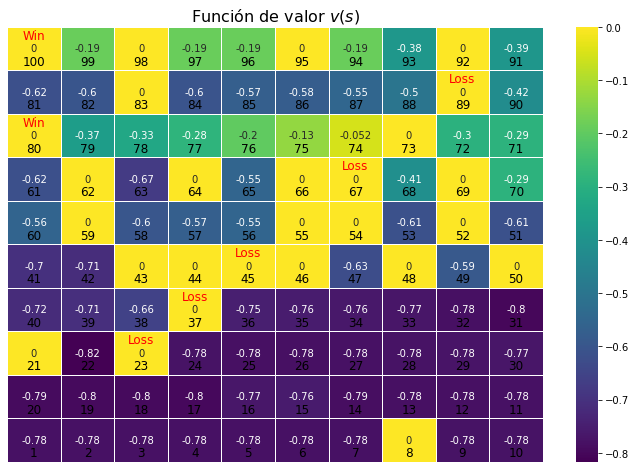

In [ ]:
matrixVs, matrixState = makeMatrixVs(valuesAdvance1)
visualizatedMatrixVs(matrixVs, matrixState, indexRewardWin, indexRewardLoss)

<p align="justify">
La política que siempre avanza, evaluada con $\gamma = 1$, tiene un valor negativo para la mayoría de los estados. El estado más favorable es el 74, seguido por los estados 99, 97, 96 y 94, indicando que desde estos estado se tiene un mejor valor esperado del retorno, esto puede ser porque se encuentran cerca del estado en el cual se gana la partida. Los estados menos favorables se ubican las primeras casillas del juego, lo cual tiene sentido ya que desde estos estados es más difícil llegar al estado ganador y es posible perder la partida.  

### $\gamma = 0.9$

In [ ]:
gamma = 0.9
epsilon = 1e-5

valuesAdvance09, sigma, sigmas =  evaluationPolicy(rewardBoard, boardState, headSnakes, floorLadders, gamma, probabilitiesTransition, epsilon, policyAdvance)

In [ ]:
for value in valuesAdvance09:
  print(f'Estado {value}: v(s) = {valuesAdvance09[value]}')

Estado 1: v(s) = -0.28349411085094106
Estado 2: v(s) = -0.29927748511518737
Estado 3: v(s) = -0.3045182070745879
Estado 4: v(s) = -0.3100132629626095
Estado 5: v(s) = -0.31719724457164844
Estado 6: v(s) = -0.3252805079504969
Estado 7: v(s) = -0.33372583340448414
Estado 8: v(s) = 0
Estado 9: v(s) = -0.3394554458867758
Estado 10: v(s) = -0.34664604266402876
Estado 11: v(s) = -0.3650893994494733
Estado 12: v(s) = -0.37916783583524305
Estado 13: v(s) = -0.3900269250428379
Estado 14: v(s) = -0.3984841281607086
Estado 15: v(s) = -0.38366546911064847
Estado 16: v(s) = -0.3945823277471576
Estado 17: v(s) = -0.4880433521472493
Estado 18: v(s) = -0.4730227736816153
Estado 19: v(s) = -0.4624198655992791
Estado 20: v(s) = -0.45486471767035047
Estado 21: v(s) = 0
Estado 22: v(s) = -0.4673607269861536
Estado 23: v(s) = 0
Estado 24: v(s) = -0.37288674718082326
Estado 25: v(s) = -0.3917345467125782
Estado 26: v(s) = -0.4044975102147217
Estado 27: v(s) = -0.41423292965268466
Estado 28: v(s) = -0.421308

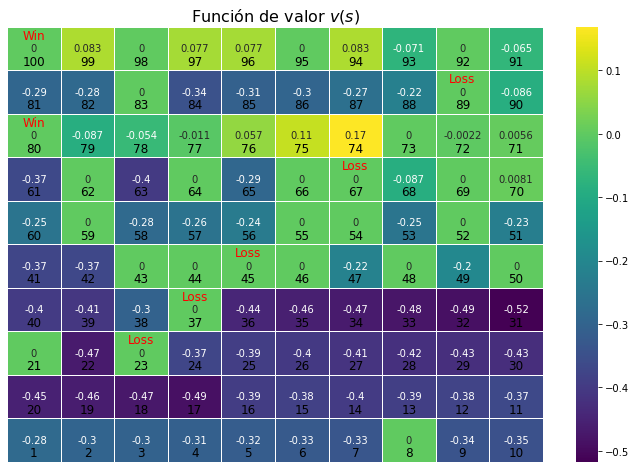

In [ ]:
matrixVs, matrixState = makeMatrixVs(valuesAdvance09)
visualizatedMatrixVs(matrixVs, matrixState, indexRewardWin, indexRewardLoss)

<p align="justify">
Con un factor de $\gamma = 0.9$ la función de valor para la política de siempre avanzar se comporta similar al caso anterior. Los estados más favorables son el 75 y 74, seguido por los estados 99, 97, 96 y 94, indicando que desde estos estado se tiene un mejor valor esperado del retorno, esto puede ser porque se encuentran cerca del estado en el cual se gana la partida. Los estados menos favorables se ubican las primeras casillas del juego, lo cual tiene sentido ya que desde estos estados es más difícil llegar al estado ganador avanzando siempre y es posible perder la partida. 

## Política aleatoria

<p align="justify">
En esta sección se realiza la evaluación de la política aleatoria uniforme en la cual las acciones quedan determinadas por probabilidades. Para esto, se construye la función para calcular la función de valor para esta política, el proceso se realiza para dos valores de descuento $\gamma$ diferentes y se visualizan los resultados.

In [ ]:
def evaluationPolicyUniformRandom(rewardBoard, boardState, headSnakes, floorLadders, gamma, probabilitiesTransition,epsilon):
    # Función que cálcula la función de valor v(s) para una política aleatoria uniforme
    # Parámetros:
    # rewardBoard = recompensas para cada estado
    # boardState = lista de estados 
    # headSnakes = estados con cabezas de serpientes
    # floorLadders = estados con bases de escaleras
    # gamma = Factor de descuento 
    # probabilitiesTransition = diccionario con las probabilidades de transición
    # epsilon= Valor que garantiza convergencia
    # policy = diccionario con la política para cada estado 

    # Retorna:
    # values = Función de valor de la politica para cada estado
    # sigma = Error final proceso 
    # sigmas = Errores en cada iteración max(sigma, |v - V(s)|)
    
    values = dict.fromkeys(boardState , 0.0)
    probabilityPolicy=dict.fromkeys(boardState , 0.0)
    sigmas = []
    totalActions = len(actionAvailable)
    while True:
        new_values = dict.fromkeys(boardState , 0.0)
        sigma = 0
        for state in boardState:
            doneFlag = gameOver[state-1]
            if doneFlag or state in floorLadders or state in headSnakes: new_values[state] = 0
            else:
                value_for_actions = []
                for action in actionAvailable:
                    value_for_action = 0
                    probabilityPolicy[state]= 1/totalActions
                    for new_state in boardState: 
                        reward = rewardBoard[new_state-1]
                        value_for_action += probabilitiesTransition[(new_state, state, action)]*(reward + gamma*values[new_state]) 
                    value_for_actions.append(probabilityPolicy[state]*value_for_action)
                new_values[state] = sum(value_for_actions)
            errorAbsVs = abs(values[state] - new_values[state])
            sigma = max(sigma, errorAbsVs)
        sigmas.append(sigma)
        values = new_values
        if sigma < epsilon: break;
        del new_values
    return values, sigma, sigmas

### $\gamma = 1$

In [ ]:
gamma = 1
epsilon = 1e-5

valuesRandom1, sigma, sigmas =  evaluationPolicyUniformRandom(rewardBoard, boardState, headSnakes, floorLadders, gamma, probabilitiesTransition, epsilon)

In [ ]:
for value in valuesRandom1: print(f'Estado {value}: v(s) = {valuesRandom1[value]}')

Estado 1: v(s) = -0.6779092436611562
Estado 2: v(s) = -0.6808174411634587
Estado 3: v(s) = -0.6801715739345566
Estado 4: v(s) = -0.6790375514863471
Estado 5: v(s) = -0.6775956477226688
Estado 6: v(s) = -0.6758924845013559
Estado 7: v(s) = -0.6739956618191443
Estado 8: v(s) = 0
Estado 9: v(s) = -0.6674957906072553
Estado 10: v(s) = -0.662852684466867
Estado 11: v(s) = -0.6602918550314797
Estado 12: v(s) = -0.6580292368307061
Estado 13: v(s) = -0.6561572719147108
Estado 14: v(s) = -0.6547604791422611
Estado 15: v(s) = -0.6194641681152083
Estado 16: v(s) = -0.6198093030589165
Estado 17: v(s) = -0.6457443064114912
Estado 18: v(s) = -0.6481789763220638
Estado 19: v(s) = -0.651554159845732
Estado 20: v(s) = -0.655834457223619
Estado 21: v(s) = 0
Estado 22: v(s) = -0.6719794835244841
Estado 23: v(s) = 0
Estado 24: v(s) = -0.6919394874192848
Estado 25: v(s) = -0.7019036047712096
Estado 26: v(s) = -0.7117982084869556
Estado 27: v(s) = -0.7215951844424509
Estado 28: v(s) = -0.76250908228924
Esta

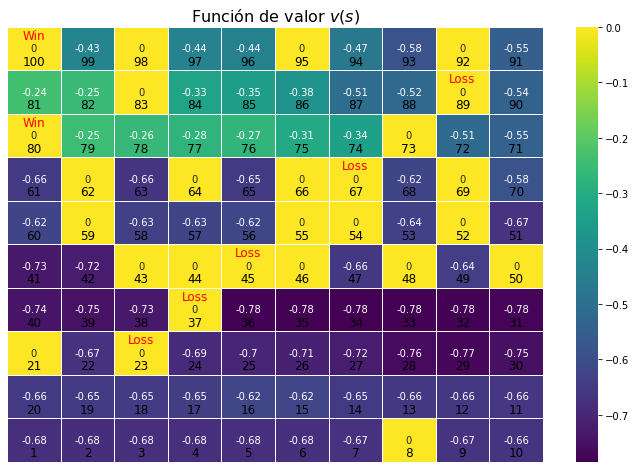

In [ ]:
matrixVs, matrixState = makeMatrixVs(valuesRandom1)
visualizatedMatrixVs(matrixVs, matrixState, indexRewardWin, indexRewardLoss)

<p align="justify">
Para el caso de la política aleatoria la función de valor logra mejores valores en los estados 79 y 78, y valores menos favorables para los primeros estados. Los estados en valores nulos corresponden a las casillas donde se encuentran las bases de escaleras, las cabezas de serpientes o se finaliza el juego. 

### $\gamma = 0.9$

In [ ]:
gamma = 0.9
epsilon = 1e-5
valuesRandom09, sigma, sigmas =  evaluationPolicyUniformRandom(rewardBoard, boardState, headSnakes, floorLadders, gamma, probabilitiesTransition, epsilon)

In [ ]:
for value in valuesRandom09: print(f'Estado {value}: v(s) = {valuesRandom09[value]}')

Estado 1: v(s) = -0.1401432239337279
Estado 2: v(s) = -0.1530590602642767
Estado 3: v(s) = -0.15358827470131217
Estado 4: v(s) = -0.15437768578674418
Estado 5: v(s) = -0.15570593013230766
Estado 6: v(s) = -0.15758076179913497
Estado 7: v(s) = -0.16002767001463103
Estado 8: v(s) = 0
Estado 9: v(s) = -0.16516577710908087
Estado 10: v(s) = -0.16702019616881833
Estado 11: v(s) = -0.1734149710316665
Estado 12: v(s) = -0.18045972853060976
Estado 13: v(s) = -0.18813003624079538
Estado 14: v(s) = -0.19639394884027706
Estado 15: v(s) = -0.17045107503442802
Estado 16: v(s) = -0.18016651736237496
Estado 17: v(s) = -0.2460338284719636
Estado 18: v(s) = -0.25667832983045724
Estado 19: v(s) = -0.26751924506775226
Estado 20: v(s) = -0.2784743801681694
Estado 21: v(s) = 0
Estado 22: v(s) = -0.30441759493093534
Estado 23: v(s) = 0
Estado 24: v(s) = -0.3259832877091141
Estado 25: v(s) = -0.33584336553164407
Estado 26: v(s) = -0.34515090726261277
Estado 27: v(s) = -0.3540938168288271
Estado 28: v(s) = -0

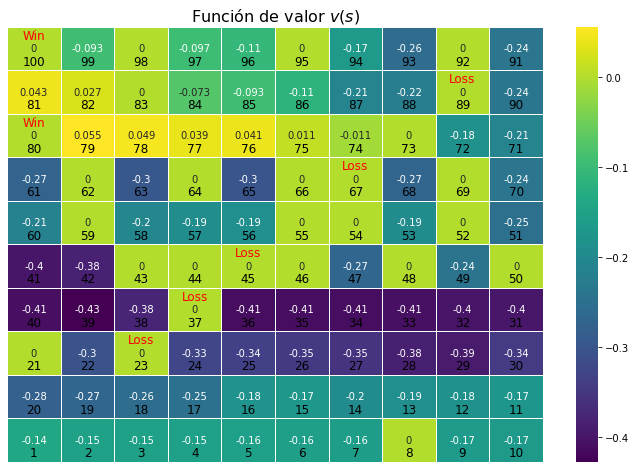

In [ ]:
matrixVs, matrixState = makeMatrixVs(valuesRandom09)
visualizatedMatrixVs(matrixVs, matrixState, indexRewardWin, indexRewardLoss)

<p align="justify">
Fijando el valor de $\gamma = 0.9$ la política aleatoria tiene un comportamiento similar al evaluado con $\gamma = 0.9$. De forma similar al caso anterior, pero con valores diferentes, la función de valor logra mejores resultados en los estados 79 y 78, y valores menos favorables para los primeros estados. Los estados en valores nulos corresponden a las casillas donde se encuentran las bases de escaleras, las cabezas de serpientes o se finaliza el juego.

# Política óptima *Value Iteration*


<p align="justify">
En esta sección se realiza la evaluación de la política aleatoria uniforme en la cual las acciones quedan determinadas por probabilidades. Para esto, se construye la función para calcular la función de valor para esta política, el proceso se realiza para dos valores de descuento $\gamma$ diferentes y se visualiza los resultados.
Se considera que una política es mejor que otra, denotado como ($\pi \geq \pi'$), si para todo estado se cumple que $v_{\pi}(s) \geq v_{\pi'}(s)$. En el caso que exista una política $\pi_{\star}$ tal que $\pi_{\star} \geq \pi'$ para cualquier política $\pi$, entonces se dirá que $\pi_{\star}$ es óptima. En MDP que son finitos es decir ($|R|, |S|, |A| < \infty$) se sabe que existe por lo menos una política óptima, además las políticas óptimas tienen la misma función de valor de estado óptima denotada como $v_{\star}(s) = \max_{\pi} v_{\pi}(s), \forall s \in S$.

<p align="justify">
La función de valor óptimo satisface las Ecuaciones optimalidad de Bellman las cuales postulan que: 

 $$v_{\star}(s) = \max_{a} \sum_{s',r} p(s', r| s,a)(r + \gamma v_{\star}(s'))$$
<p align="justify">
Al tener escenarios con recompensa determinística ya se estableció que $p(s', r| s,a) = p(s'| s,a)$ si la recompensa $r = R(s)$ es igual a la recompensa observada en ese estado y $0$ en cualquier otro caso, entonces para este caso específico las Ecuaciones de optimalidad de Bellman se escriben como:

$$v_{\star}(s) = \max_{a} \sum_{s',r} p(s'| s,a)(r + \gamma v_{\star}(s'))$$
<p align="justify">
En el caso del juego planteado las Ecuaciones de optimalidad de Bellman son un conjunto de $100$ ecuaciones no lineales, por la presencia del máximo, con $100$ incógnitas. Además, dado que el MDP es finito estas ecuaciones tienen solución única la cual es independiente de la política. 

<p align="justify">
El conjunto de ecuaciones se podría resolver directamente, sin embargo esto implica un gran costo computacional. Una forma de resolver las ecuaciones es utilizar **Programación Dinámica**, en este caso las ecuaciones se resuelven iterativamente por un proceso se asignación, de modo que:

$$V_{i+1}(s) \leftarrow \max_{a} \sum_{s',r} p(s'| s,a)(r + \gamma V_{i}(s'))$$
<p align="justify">
Esta forma de actualización se conoce como **Iteración de valor**, cuando el algoritmo converge se puede encontrar la función de valor óptima y se puede encontrar su política óptima asociada como:


$$\pi(s) = \arg\max_{a} \sum_{s',r} p(s'| s,a)(r + \gamma V(s'))$$


<p align="justify">
A continuación se implementa el algoritmo de Iteración de Valor para encontrar la política óptima para el juego de serpientes y escaleras. Esta implementación usa programación dinámica para resolver las Ecuaciones de optimalidad de Bellman.

---

In [ ]:
def betterPolicyValueIteration(rewardBoard, boardState, headSnakes, floorLadders, gamma, probabilitiesTransition, iteration):
    # Función de cálculo de la politica y función de valor óptimas
    # Parámetros
    # rewardBoard = recompensas para cada estado
    # boardState = lista de estados 
    # headSnakes = estados con cabezas de serpientes
    # floorLadders = estados con bases de escaleras
    # gamma = Factor de descuento 
    # probabilitiesTransition diccionario con las probabilidades de transición
    # iteration = Número de iteraciones del proceso 

    # Retorna 
    # values = Función de valor óptima para cada estado
    # policy = Política óptima para cada estado 
    # sigma = Error final proceso 
    # sigmas = Error en cada iteración max(sigma, |v - V(s)|)


    values = dict.fromkeys(boardState , 0.0) # Diccionario con valores de v(s) en función del estado 
    policy = dict.fromkeys(boardState , 0.0) # Diccionario con valores de la política en función del estado
    sigmas = [] # Errores máximos de estimación en cada iteración 
    
    # Inicia ciclo de programación dinámica 
    for k in range(iteration): 
        
        newValues = dict.fromkeys(boardState , 0.0)
        sigma = 0
        for state in boardState:
            # Para estados terminales no hay actualización 
            doneFlag = gameOver[state-1]
            if doneFlag:
                newValues[state] = 0
                policy[state] = 'Estado Terminal'
            # Para estados base escalera o cabeza serpiente no hay política 
            elif state in floorLadders: policy[state] = 'Base escalera'
            elif state in headSnakes:   policy[state] = 'Cabeza serpiente'
            else:
                valueActions = []
                actionEvaluated = []
                for action in actionAvailable:
                    valueAction = 0
                    for newState in boardState: # Ciclo de suma sobre todos los posibles valores de s'
                        reward = rewardBoard[newState-1]
                        valueAction += probabilitiesTransition[(newState, state, action)]*(reward + gamma*values[newState]) 
                    valueActions.append(valueAction)
                    actionEvaluated.append(action)
                newValues[state] = np.max(valueActions)
                policy[state] = actionEvaluated[np.argmax(valueActions)]  
            errorAbsVs = abs(values[state] - newValues[state])
            sigma= max(sigma, errorAbsVs)
        sigmas.append(sigma)
        values = newValues
        del newValues
    return values, policy, sigma, sigmas  

## Parámetro $\gamma = 1$

In [ ]:
gamma = 1
iterations = 500
values, policy, sigma, sigmaIteration = betterPolicyValueIteration(rewardBoard, boardState, 
                                                                   headSnakes, floorLadders, 
                                                                   gamma, probabilitiesTransition, iterations)

<p align="justify">
Finalizado el algoritmo es importante verificar la convergencia, para esto se presentan la gráfica de los errores máximos de actualización de la función de valor. En cada iteración la máxima diferencia para algún estado $s$ del valor $V_{i+1}(s)$ con el valor pasado $V_i(s)$ se asume como el error de aproximación, en la siguiente gráfica se presenta la evolución de este parámetro a través del número de iteraciones. 

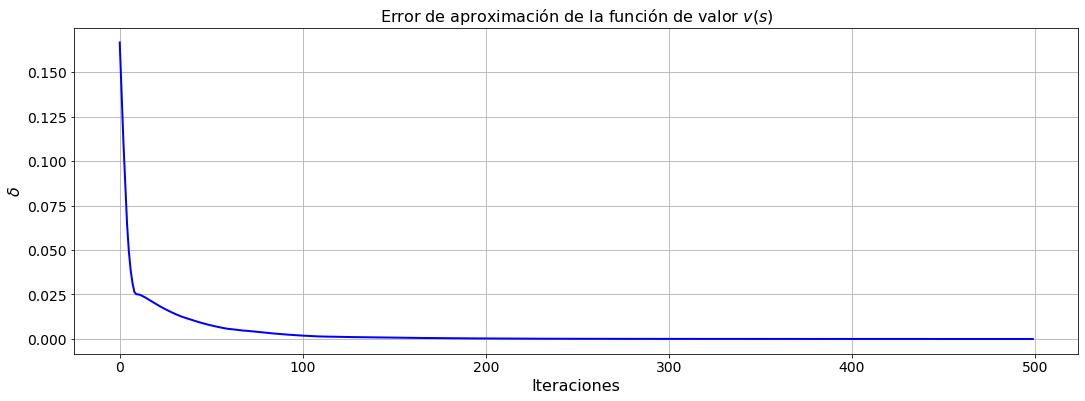

In [ ]:
plt.figure(figsize=(18,6))
plt.plot(sigmaIteration, linewidth=2, color='blue')
plt.title('Error de aproximación de la función de valor $v(s)$', fontsize = 16)
plt.xlabel('Iteraciones', fontsize = 16)
plt.ylabel(r'$\delta$', fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.grid()
plt.show()

<p align="justify">
Como se puede analizar en la gráfica a medida que las iteraciones aumentan el error de estimación disminye lo que indica que el algoritmo esta estimando y a la vez encontrando el valor adecuado para la función $v_{\star}(s)$. 

A continuación se presentan los valores de la función de valor $v_{\star}(s)$ y la gráfica en mapa de calor. 

In [ ]:
for value in values:
  print(f'Estado {value}: v(s) = {values[value]}')

Estado 1: v(s) = 0.9444243322622482
Estado 2: v(s) = 0.9444212321450978
Estado 3: v(s) = 0.9444212321450978
Estado 4: v(s) = 0.9444212321450978
Estado 5: v(s) = 0.9444212321450978
Estado 6: v(s) = 0.9444212321450978
Estado 7: v(s) = 0.9444425228056753
Estado 8: v(s) = 0.0
Estado 9: v(s) = 0.9999998809017403
Estado 10: v(s) = 0.9999998828199941
Estado 11: v(s) = 0.9999998828199941
Estado 12: v(s) = 0.9999998828199941
Estado 13: v(s) = 0.9999998828199941
Estado 14: v(s) = 0.9999998828199941
Estado 15: v(s) = 0.9999998939646375
Estado 16: v(s) = 0.9999998939646375
Estado 17: v(s) = 0.9999998828199941
Estado 18: v(s) = 0.9999998828199941
Estado 19: v(s) = 0.9999998828199941
Estado 20: v(s) = 0.9999998828199941
Estado 21: v(s) = 0.0
Estado 22: v(s) = 0.9999998939646375
Estado 23: v(s) = 0
Estado 24: v(s) = 0.6666665808007233
Estado 25: v(s) = 0.6666560072815753
Estado 26: v(s) = 0.6666560072815753
Estado 27: v(s) = 0.6666560072815753
Estado 28: v(s) = 0.6666560072815753
Estado 29: v(s) = 0.

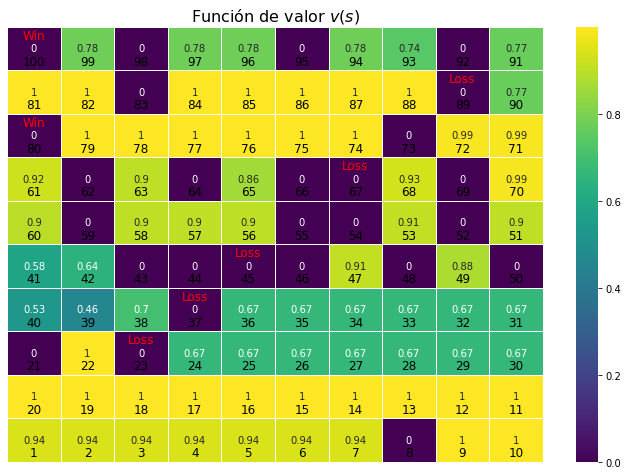

In [ ]:
matrixVs, matrixState = makeMatrixVs(values)
visualizatedMatrixVs(matrixVs, matrixState, indexRewardWin, indexRewardLoss)

<p align="justify">
La política también se visualizará en una matriz con la misma distribución del tablero de juego, en la matriz se incluirá como color de celda el valor de la función de valor, además de una letra indicando si se debe avanzar "A" o retroceder "R". En la matriz se incluirá una etiqueta para aquellos estados ganadores, perdedores y donde se encuentren cabezas de serpientes o bases de escaleras.

In [ ]:
def visualizatedPolicy(policy, matrixVs, matrixState, indexRewardWin, indexRewardLoss, headSnakes, floorLadders):
  # Función que visualiza en un mapa de calor la matriz con la estructura del tablero 
  # de juego de la función de valor y la política en cada casilla 
  # Parámetros
  # policy = diccionario con la política para cada estado 
  # matrixVs = matriz con la función de valor 
  # matrixState = matriz con los estados dispuesto en el orden del tablero de juego 
  # indexRewardWin = estados ganadores
  # indexRewardLoss = estados perderdores
  # Retorna 
  # visualización del mapa de calor

  
  plt.figure(figsize=(12,8))
  sns.heatmap(matrixVs, cmap= 'viridis', linewidths = 0.75, 
              xticklabels = False, yticklabels = False, linecolor = "white")

  # Agregar números adicionales a cada celda
  for i in range(10):
      for j in range(10):
          plt.annotate(str(int(matrixState[i,j])), xy=(j+0.5, i+0.8), 
                      ha='center', va='center', color = 'black', fontsize = 12)
          winFlag = matrixState[i,j] in indexRewardWin
          lossFlag = matrixState[i,j] in indexRewardLoss
          snakeFlag = matrixState[i,j] in headSnakes
          ladderFlag = matrixState[i,j] in floorLadders
          if  winFlag or  lossFlag or snakeFlag or ladderFlag:
            pass
          else:
            plt.annotate(str(policy[int(matrixState[i,j])]), xy=(j+0.5, i+0.5), 
                      ha='center', va='center', color = 'black', fontsize = 12)

  for indexWin in indexRewardWin:
    i = np.where(matrixState == indexWin)[0][0]
    j = np.where(matrixState == indexWin)[1][0]
    plt.annotate('Win', xy=(j+0.5, i+0.2), 
                      ha='center', va='center', color = 'red', fontsize = 12)
    
  for indexLoss in indexRewardLoss:
    i = np.where(matrixState == indexLoss)[0][0]
    j = np.where(matrixState == indexLoss)[1][0]
    plt.annotate('Loss', xy=(j+0.5, i+0.2), 
                      ha='center', va='center', color = 'red', fontsize = 12)

  for snake in headSnakes:
    i = np.where(matrixState == snake)[0][0]
    j = np.where(matrixState == snake)[1][0]
    plt.annotate('Head Snake', xy=(j+0.5, i+0.5), 
                      ha='center', va='center', color = 'green', fontsize = 8)
    
  for ladder in floorLadders:
    i = np.where(matrixState == ladder)[0][0]
    j = np.where(matrixState == ladder)[1][0]
    plt.annotate('Floor Ladder', xy=(j+0.5, i+0.5), 
                      ha='center', va='center', color = 'magenta', fontsize = 8)
    
  plt.title(r"Mapa de calor función de valor $v(s)$ y política óptima", fontsize = 16)
  plt.show()

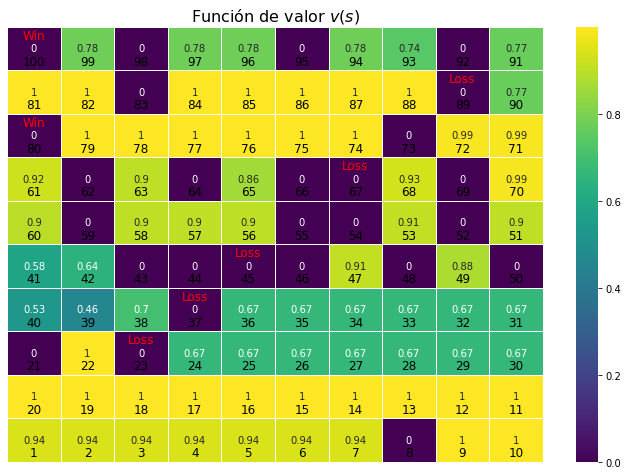

In [ ]:
matrixVs, matrixState = makeMatrixVs(values)
visualizatedMatrixVs(matrixVs, matrixState, indexRewardWin, indexRewardLoss)

In [ ]:
for value in policy:
  print(f'Estado {value}: Política = {policy[value]}')

Estado 1: Política = A
Estado 2: Política = R
Estado 3: Política = R
Estado 4: Política = R
Estado 5: Política = R
Estado 6: Política = R
Estado 7: Política = A
Estado 8: Política = Base escalera
Estado 9: Política = A
Estado 10: Política = A
Estado 11: Política = A
Estado 12: Política = A
Estado 13: Política = A
Estado 14: Política = A
Estado 15: Política = A
Estado 16: Política = A
Estado 17: Política = R
Estado 18: Política = R
Estado 19: Política = R
Estado 20: Política = R
Estado 21: Política = Base escalera
Estado 22: Política = R
Estado 23: Política = Estado Terminal
Estado 24: Política = R
Estado 25: Política = A
Estado 26: Política = A
Estado 27: Política = A
Estado 28: Política = A
Estado 29: Política = A
Estado 30: Política = R
Estado 31: Política = R
Estado 32: Política = R
Estado 33: Política = R
Estado 34: Política = R
Estado 35: Política = R
Estado 36: Política = R
Estado 37: Política = Estado Terminal
Estado 38: Política = A
Estado 39: Política = A
Estado 40: Política =

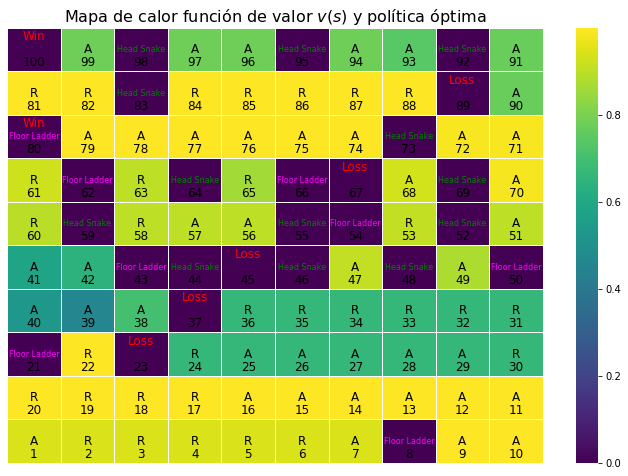

In [ ]:
visualizatedPolicy(policy, matrixVs, matrixState, indexRewardWin, indexRewardLoss, headSnakes, floorLadders)

<p align="justify">
La política óptima encontrada sugiere para cada estado una acción que maximiza el valor esperado del retorno. Sin embargo, es importante notar varios aspectos, de los estados 25 a 35 la función de valor es similar y la política sugiere un ciclo que confina al jugador a quedarse entre estas casillas. Si se parte de la casilla 25 y se avanza como sugiere la política óptima se llega a lo sumo al estado 31 en el cual debe regresar y a lo sumo quedará nuevamente en 25, en cualquier otro caso encontrará casillas de avanzar la más lejana (29) lo lleva al jugador a lo sumo a la casilla 35 donde nuevamente debe retroceder. Entonces, si el jugador sigue esta política y por alguna razón queda en estos estados, el juego no tendrá fin. 

## Parámetro $\gamma = 0.9$

In [ ]:
gamma = 0.9
iterations = 500
values, policy, sigma, sigmaIteration = betterPolicyValueIteration(rewardBoard, boardState, 
                                                                   headSnakes, floorLadders, 
                                                                   gamma, probabilitiesTransition, iterations)

Similar al caso anterior se presenta la evolución del error de aproximación. 

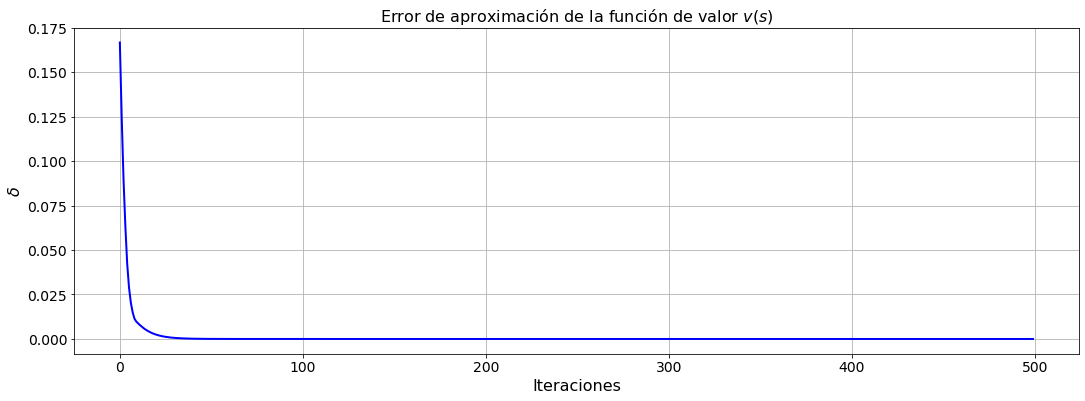

In [ ]:
plt.figure(figsize=(18,6))
plt.plot(sigmaIteration, linewidth=2, color='blue')
plt.title('Error de aproximación de la función de valor $v(s)$', fontsize = 16)
plt.xlabel('Iteraciones', fontsize = 16)
plt.ylabel(r'$\delta$', fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.grid()
plt.show()

Como se puede observar, la evolución del error de actualización disminuye, lo que indica que el algoritmo converge, estimando y encontrando la función de valor $v_{\star}(s)$.

In [ ]:
for value in values:
  print(f'Estado {value}: v(s) = {values[value]}')

Estado 1: v(s) = 0.09235508456221976
Estado 2: v(s) = 0.08825538176283862
Estado 3: v(s) = 0.08917089509905186
Estado 4: v(s) = 0.09846527497569259
Estado 5: v(s) = 0.10654734443364106
Estado 6: v(s) = 0.11357523091881361
Estado 7: v(s) = 0.1196864365580941
Estado 8: v(s) = 0.0
Estado 9: v(s) = 0.15240641711229924
Estado 10: v(s) = 0.16042780748663077
Estado 11: v(s) = 0.1604278074866308
Estado 12: v(s) = 0.16042780748663077
Estado 13: v(s) = 0.16042780748663077
Estado 14: v(s) = 0.16042780748663077
Estado 15: v(s) = 0.21390374331550777
Estado 16: v(s) = 0.21390374331550777
Estado 17: v(s) = 0.16042780748663077
Estado 18: v(s) = 0.1604278074866308
Estado 19: v(s) = 0.16042780748663077
Estado 20: v(s) = 0.16042780748663077
Estado 21: v(s) = 0.0
Estado 22: v(s) = 0.21390374331550777
Estado 23: v(s) = 0
Estado 24: v(s) = 0.023172905525846527
Estado 25: v(s) = 0.003791929995138518
Estado 26: v(s) = 0.003791929995138518
Estado 27: v(s) = 0.003791929995138518
Estado 28: v(s) = 0.003791929995

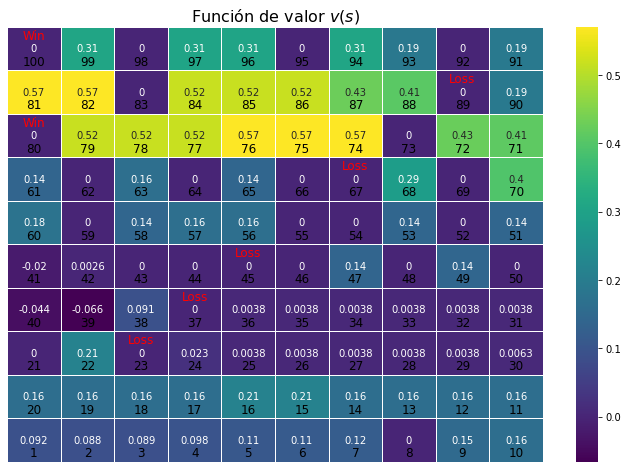

In [ ]:
matrixVs, matrixState = makeMatrixVs(values)
visualizatedMatrixVs(matrixVs, matrixState, indexRewardWin, indexRewardLoss)

In [ ]:
for value in policy:
  print(f'Estado {value}: Política = {policy[value]}')

Estado 1: Política = A
Estado 2: Política = R
Estado 3: Política = A
Estado 4: Política = A
Estado 5: Política = A
Estado 6: Política = A
Estado 7: Política = A
Estado 8: Política = Base escalera
Estado 9: Política = A
Estado 10: Política = A
Estado 11: Política = A
Estado 12: Política = A
Estado 13: Política = A
Estado 14: Política = A
Estado 15: Política = A
Estado 16: Política = A
Estado 17: Política = R
Estado 18: Política = R
Estado 19: Política = R
Estado 20: Política = R
Estado 21: Política = Base escalera
Estado 22: Política = R
Estado 23: Política = Estado Terminal
Estado 24: Política = R
Estado 25: Política = A
Estado 26: Política = A
Estado 27: Política = A
Estado 28: Política = A
Estado 29: Política = A
Estado 30: Política = R
Estado 31: Política = R
Estado 32: Política = R
Estado 33: Política = R
Estado 34: Política = R
Estado 35: Política = R
Estado 36: Política = R
Estado 37: Política = Estado Terminal
Estado 38: Política = A
Estado 39: Política = A
Estado 40: Política =

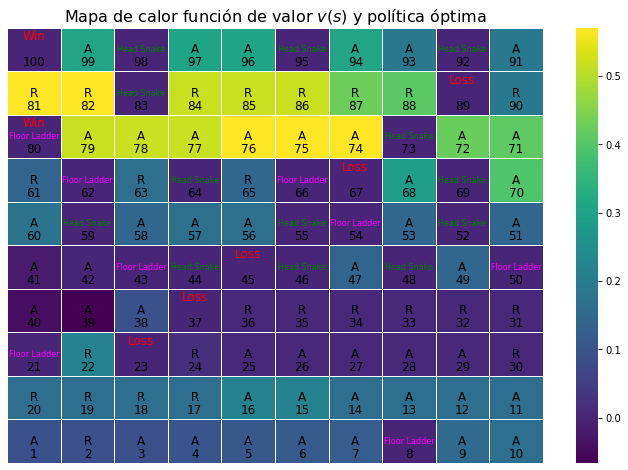

In [ ]:
visualizatedPolicy(policy, matrixVs, matrixState, indexRewardWin, indexRewardLoss, headSnakes, floorLadders)

<p align="justify">
La política óptima encontrada es un poco similar a la encontrada con $\gamma = 1$, en los primeros estados se observa una diferencia ya que sugiere avanzar para los estados 3 a 6, mientras que en el caso anterior la mejor acción es regresar. Sin embargo, igual que en el caso anterior para los estados 25 a 35 la función de valor es similar y la política sugiere un ciclo que confina al jugador a quedarse entre estas casillas. Igual que el caso anterior el estado menos favorable es la casilla 39, en la cual ambas políticas sugieren avanzar. Los mejores estados se ubican en la parte superior del tablero y ambas políticas coinciden para los estados del 74 al 79 en optar por la opción avanzar, y para 88 a 84 regresar.

## Comparación con políticas anteriores

<p align="justify">
En esta sección se compara la función de valor de la política óptima con las funciones de valor de las políticas que siempre avanza y la aleatoria. De acuerdo con la teoría si la política es óptima su función de valor asociada debe ser para todos los estados mayor o igual a la función de valor de cualquier otra política. A continuación se verifica esta condición presentando en mapas de calor la diferencia de la función de valor entre la política óptima y las dos políticas siempre avanza y aleatoria.  

In [ ]:
diffPolicyAdvance1 = {} # Diccionario para la diferencia entre la política óptima y avanza
diffPolicyRandom1 = {} # Diccionario para la diferencia entre la política óptima y aleatoria
diffPolicyAdvance09 = {} # Diccionario para la diferencia entre la política óptima y avanza
diffPolicyRandom09 = {} # Diccionario para la diferencia entre la política óptima y aleatoria
for state in boardState:
  diffPolicyAdvance1[state] = values[state] - valuesAdvance1[state]
  diffPolicyRandom1[state] =  values[state] - valuesRandom1[state]
  diffPolicyAdvance09[state] = values[state] - valuesAdvance09[state]
  diffPolicyRandom09[state] =  values[state] - valuesRandom09[state]

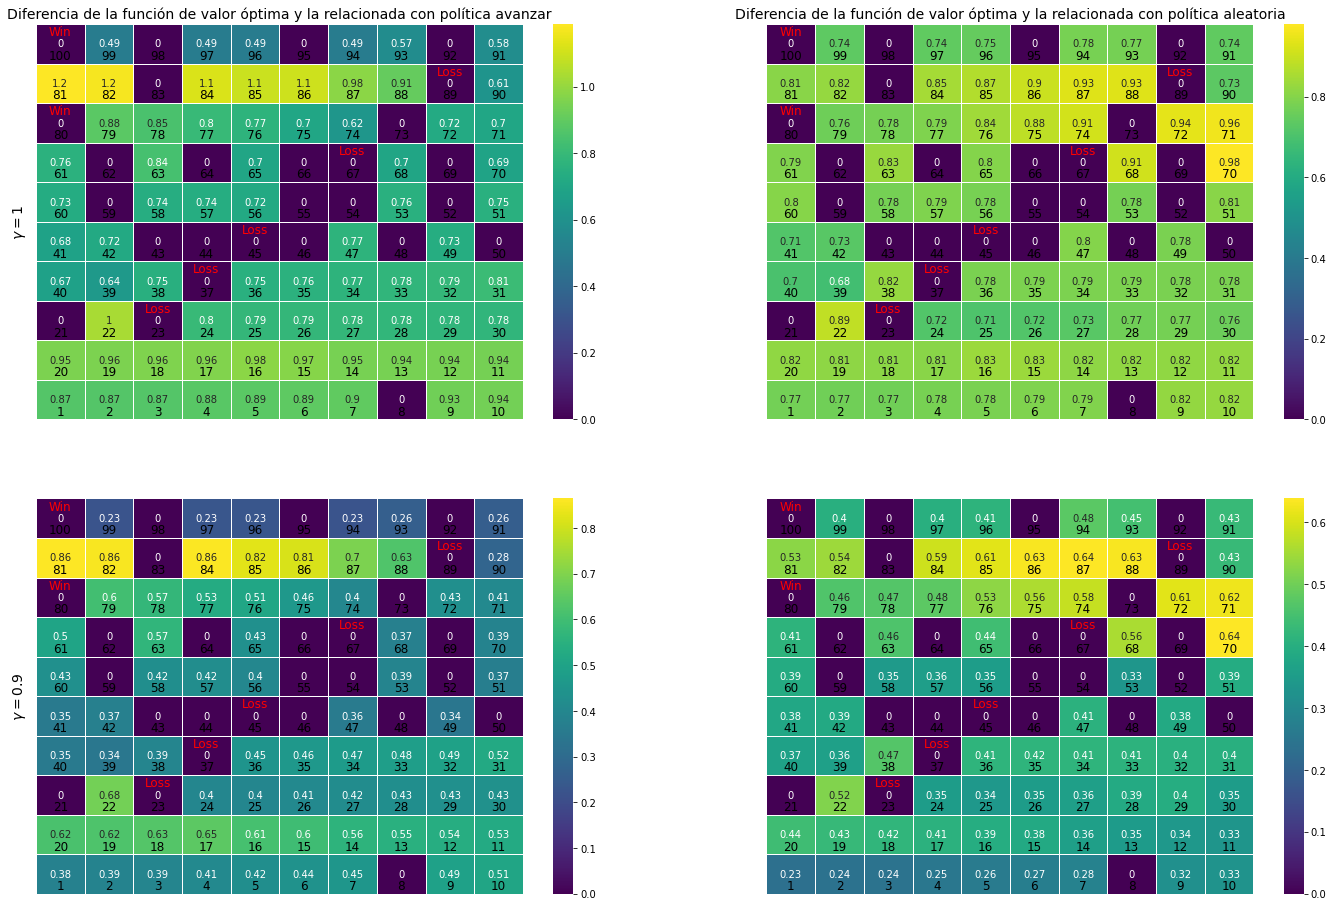

In [ ]:
# Visualización en matrices de calor de la diferencia de políticas 
matrixdiffVsAdvance1, matrixState = makeMatrixVs(diffPolicyAdvance1)
matrixdiffVsRandom1, _ = makeMatrixVs(diffPolicyRandom1)
matrixdiffVsAdvance09, _ = makeMatrixVs(diffPolicyAdvance09)
matrixdiffVsRandom09, _ = makeMatrixVs(diffPolicyRandom09)


fig, ax = plt.subplots(2,2, figsize=(24,16))

sns.heatmap(matrixdiffVsAdvance1, cmap='viridis', ax = ax[0][0], annot = True, 
            linewidths = 0.75, xticklabels = False, yticklabels = False, 
            linecolor = "white")
for i in range(10):
      for j in range(10):
          ax[0][0].annotate(str(int(matrixState[i,j])), xy=(j+0.5, i+0.8), 
                      ha='center', va='center', color = 'black', fontsize = 12)

# Agregar etiqueta de estado ganador
for indexWin in indexRewardWin:
  i = np.where(matrixState == indexWin)[0][0]
  j = np.where(matrixState == indexWin)[1][0]
  ax[0][0].annotate('Win', xy=(j+0.5, i+0.2), 
                    ha='center', va='center', color = 'red', fontsize = 12)
  
# Agregar etiqueta de estado perdedor  
for indexLoss in indexRewardLoss:
  i = np.where(matrixState == indexLoss)[0][0]
  j = np.where(matrixState == indexLoss)[1][0]
  ax[0][0].annotate('Loss', xy=(j+0.5, i+0.2), 
                      ha='center', va='center', color = 'red', fontsize = 12)

sns.heatmap(matrixdiffVsRandom1, cmap='viridis', ax = ax[0][1], annot = True, 
            linewidths = 0.75, xticklabels = False, yticklabels = False, 
            linecolor = "white")

for i in range(10):
      for j in range(10):
          ax[0][1].annotate(str(int(matrixState[i,j])), xy=(j+0.5, i+0.8), 
                      ha='center', va='center', color = 'black', fontsize = 12)

# Agregar etiqueta de estado ganador
for indexWin in indexRewardWin:
  i = np.where(matrixState == indexWin)[0][0]
  j = np.where(matrixState == indexWin)[1][0]
  ax[0][1].annotate('Win', xy=(j+0.5, i+0.2), 
                    ha='center', va='center', color = 'red', fontsize = 12)
  
# Agregar etiqueta de estado perdedor  
for indexLoss in indexRewardLoss:
  i = np.where(matrixState == indexLoss)[0][0]
  j = np.where(matrixState == indexLoss)[1][0]
  ax[0][1].annotate('Loss', xy=(j+0.5, i+0.2), 
                      ha='center', va='center', color = 'red', fontsize = 12)


sns.heatmap(matrixdiffVsAdvance09, cmap='viridis', ax = ax[1][0], annot = True, 
            linewidths = 0.75, xticklabels = False, yticklabels = False, 
            linecolor = "white")
for i in range(10):
      for j in range(10):
          ax[1][0].annotate(str(int(matrixState[i,j])), xy=(j+0.5, i+0.8), 
                      ha='center', va='center', color = 'black', fontsize = 12)

# Agregar etiqueta de estado ganador
for indexWin in indexRewardWin:
  i = np.where(matrixState == indexWin)[0][0]
  j = np.where(matrixState == indexWin)[1][0]
  ax[1][0].annotate('Win', xy=(j+0.5, i+0.2), 
                    ha='center', va='center', color = 'red', fontsize = 12)
  
# Agregar etiqueta de estado perdedor  
for indexLoss in indexRewardLoss:
  i = np.where(matrixState == indexLoss)[0][0]
  j = np.where(matrixState == indexLoss)[1][0]
  ax[1][0].annotate('Loss', xy=(j+0.5, i+0.2), 
                      ha='center', va='center', color = 'red', fontsize = 12)

sns.heatmap(matrixdiffVsRandom09, cmap='viridis', ax = ax[1][1], annot = True, 
            linewidths = 0.75, xticklabels = False, yticklabels = False, 
            linecolor = "white")
for i in range(10):
      for j in range(10):
          ax[1][1].annotate(str(int(matrixState[i,j])), xy=(j+0.5, i+0.8), 
                      ha='center', va='center', color = 'black', fontsize = 12)

# Agregar etiqueta de estado ganador
for indexWin in indexRewardWin:
  i = np.where(matrixState == indexWin)[0][0]
  j = np.where(matrixState == indexWin)[1][0]
  ax[1][1].annotate('Win', xy=(j+0.5, i+0.2), 
                    ha='center', va='center', color = 'red', fontsize = 12)
  
# Agregar etiqueta de estado perdedor  
for indexLoss in indexRewardLoss:
  i = np.where(matrixState == indexLoss)[0][0]
  j = np.where(matrixState == indexLoss)[1][0]
  ax[1][1].annotate('Loss', xy=(j+0.5, i+0.2), 
                      ha='center', va='center', color = 'red', fontsize = 12)

ax[0][0].set_title('Diferencia de la función de valor óptima y la relacionada con política avanzar',
                fontsize = 14)
ax[0][0].set_ylabel(r'$\gamma = 1$',
                fontsize = 14)

ax[0][1].set_title('Diferencia de la función de valor óptima y la relacionada con política aleatoria',
                fontsize = 14)

ax[1][0].set_ylabel(r'$\gamma = 0.9$',
                fontsize = 14)
plt.show()

<p align="justify">
Como se puede observar en las matrices de calor la diferencia entre la función de valor de la política óptima y las políticas de avanzar y aleatoria siempre es positiva, esto indica que la política óptima es mejor que estas dos políticas para ambos factores de descuento $\gamma$, en general las políticas óptimas debe ser mejor que cualquier otra y esto se evidenciaría como mayor valor de función $v(s)$ para todos los estados $s$. 

# Política óptima distinta configuración


<p align="justify">
En esta sección se realiza una variación del tablero, ubicando dos estados ganadores en las primeras dos  filas y siete estados de pérdida en las primeras nueve filas del tablero. Teniendo en cuenta que no tiene sentido ubicar estados terminales en las bases de las escaleras o en las cabezas de las serpientes, la elección aleatoria se realizará evitando los estados con estos elementos. Es más, como se consideró en los análisis pasados los estados con cabezas de serpientes o bases de escaleras es como si no existieran, por eso, en la configuración aleatoria para seguir manteniendo el tablero original se descartaran estas posiciones como estados finales. Para esta nueva configuración del tablero se calcula la función de valor óptima y la política óptima utilizando dos valores de descuento $\gamma$, en ambos casos se visualizan los resultados en una matriz de color.  

In [ ]:
# Generar dos estados ganadores en las primeras dos filas (81 a 100) sin ubicarse en cabezas de serpientes o bases de escaleras

twoFirtsRows = range(81, 101)
twoFirtsRowAvailable = [i for i in twoFirtsRows if (i in headSnakes) == False and (i in floorLadders) == False ]
indexRewardWin = list(np.random.choice(twoFirtsRowAvailable, 2, replace = False))
indexRewardWin

[93, 87]

In [ ]:
# Generar 7 estados perderdores en las primeras nueve filas (11 a 100) 
# sin ubicarse en cabezas de serpientes o bases de escaleras, o en estados ganadores 

nineFirtsRows = range(11, 101)
nineFirtsRowAvailable = [i for i in nineFirtsRows if (i in headSnakes) == False and (i in floorLadders) == False and (i in indexRewardWin) == False]
indexRewardLoss = list(np.random.choice(nineFirtsRowAvailable, 7, replace=False))
indexRewardLoss

[61, 79, 19, 37, 38, 13, 58]

In [ ]:
# Inicialización de todos los elementos del tablero
boardState, rewardBoard, rewards, actionAvailable, gameOver, headSnakes, tailSnakes, floorLadders, ceilLadders  = parametersBoard(indexRewardWin, indexRewardLoss)

In [ ]:
# Cálculo de las probabilidades de transición 
probabilitiesTransition = transitionProbilities(boardState, actionAvailable)

### $\gamma = 1$

In [ ]:
gamma = 1
iterations = 500
values, policy, sigma, sigmaIteration = betterPolicyValueIteration(rewardBoard, boardState, 
                                                                   headSnakes, floorLadders, 
                                                                   gamma, probabilitiesTransition, iterations)

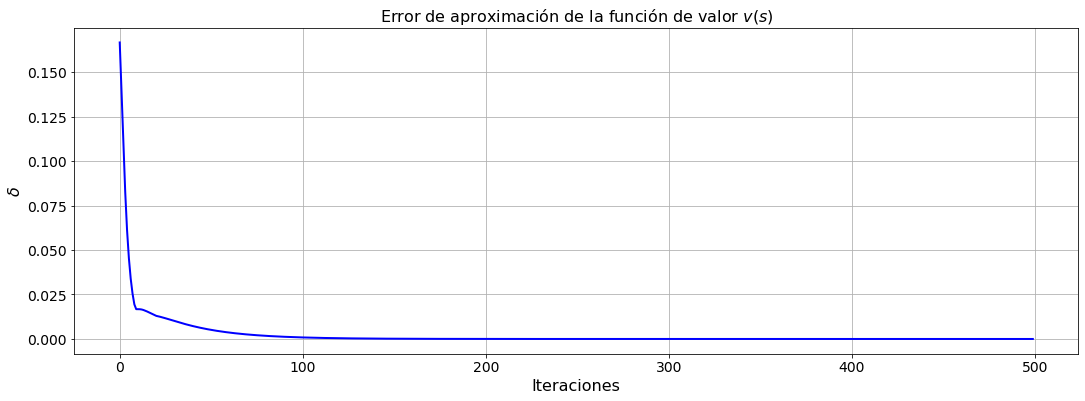

In [ ]:
plt.figure(figsize=(18,6))
plt.plot(sigmaIteration, linewidth=2, color='blue')
plt.title('Error de aproximación de la función de valor $v(s)$', fontsize = 16)
plt.xlabel('Iteraciones', fontsize = 16)
plt.ylabel(r'$\delta$', fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.grid()
plt.show()

In [ ]:
for value in values:
  print(f'Estado {value}: v(s) = {values[value]}')

Estado 1: v(s) = 0.5851411431699753
Estado 2: v(s) = 0.5851411438346706
Estado 3: v(s) = 0.5851411438346708
Estado 4: v(s) = 0.5851411438346706
Estado 5: v(s) = 0.5851411438346706
Estado 6: v(s) = 0.5851411438346706
Estado 7: v(s) = 0.5851411431699753
Estado 8: v(s) = 0.0
Estado 9: v(s) = 0.5851411438346706
Estado 10: v(s) = 0.5851411438346708
Estado 11: v(s) = 0.5851411438346706
Estado 12: v(s) = 0.5851411438346706
Estado 13: v(s) = 0
Estado 14: v(s) = 0.32095095340200996
Estado 15: v(s) = 0.2769192543483946
Estado 16: v(s) = 0.22554894381858684
Estado 17: v(s) = 0.27691925844547877
Estado 18: v(s) = 0.320950956700242
Estado 19: v(s) = 0
Estado 20: v(s) = 0.5851411476831991
Estado 21: v(s) = 0.0
Estado 22: v(s) = 0.5851411463561453
Estado 23: v(s) = 0.5851411463561453
Estado 24: v(s) = 0.5851411463561453
Estado 25: v(s) = 0.5851411463561453
Estado 26: v(s) = 0.5851411476831991
Estado 27: v(s) = 0.5851411476831991
Estado 28: v(s) = 0.5851411463561453
Estado 29: v(s) = 0.585141146356145

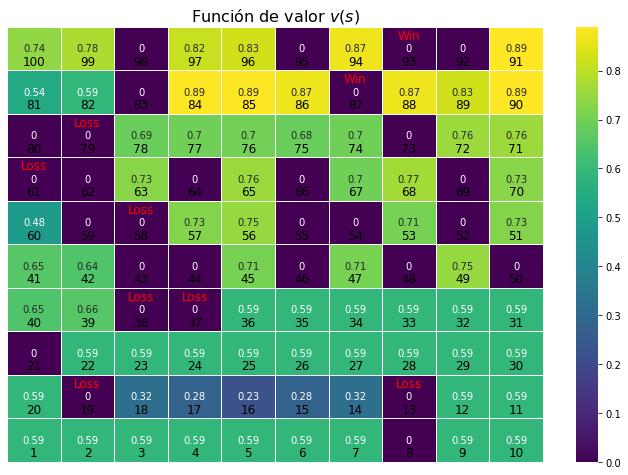

In [ ]:
matrixVs, matrixState = makeMatrixVs(values)
visualizatedMatrixVs(matrixVs, matrixState, indexRewardWin, indexRewardLoss)

In [ ]:
for value in policy:
  print(f'Estado {value}: Política = {policy[value]}')

Estado 1: Política = A
Estado 2: Política = A
Estado 3: Política = A
Estado 4: Política = A
Estado 5: Política = A
Estado 6: Política = A
Estado 7: Política = R
Estado 8: Política = Base escalera
Estado 9: Política = R
Estado 10: Política = R
Estado 11: Política = R
Estado 12: Política = R
Estado 13: Política = Estado Terminal
Estado 14: Política = R
Estado 15: Política = R
Estado 16: Política = A
Estado 17: Política = A
Estado 18: Política = A
Estado 19: Política = Estado Terminal
Estado 20: Política = A
Estado 21: Política = Base escalera
Estado 22: Política = A
Estado 23: Política = A
Estado 24: Política = A
Estado 25: Política = A
Estado 26: Política = R
Estado 27: Política = R
Estado 28: Política = R
Estado 29: Política = R
Estado 30: Política = R
Estado 31: Política = R
Estado 32: Política = R
Estado 33: Política = R
Estado 34: Política = R
Estado 35: Política = R
Estado 36: Política = R
Estado 37: Política = Estado Terminal
Estado 38: Política = Estado Terminal
Estado 39: Políti

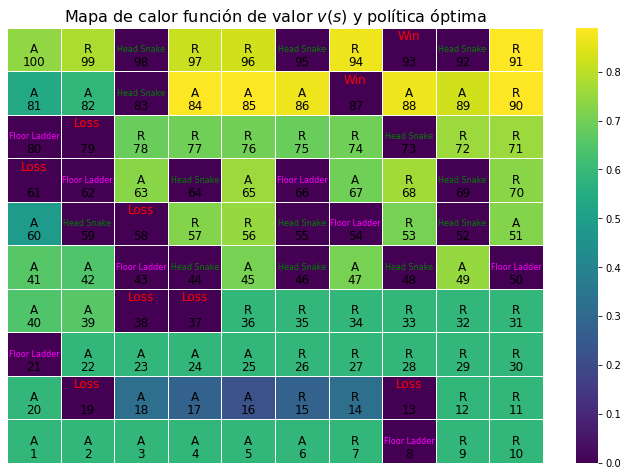

In [ ]:
visualizatedPolicy(policy, matrixVs, matrixState, indexRewardWin, indexRewardLoss, headSnakes, floorLadders)

<p align="justify">
Para la nueva configuración de tablero con estados ganadores 93 y 87, la política óptima indica que cerca de estados de pérdida es mejor regresar. La política también indica que cerca de los estados ganadores el jugador debe avanzar o retroceder para alcanzar este estado. Para esta configuración del tablero no se presentan ciclos. En este caso los estados más deseables se ubican en la parte superior del tablero y los menos favorables son los comprendidos entre 14 y 18, esto tiene sentido ya que están atrapados en medio de dos estados perdedores 13 y 19.

### $\gamma = 0.9$

In [ ]:
gamma = 0.9
iterations = 500
values, policy, sigma, sigmaIteration = betterPolicyValueIteration(rewardBoard, boardState, 
                                                                   headSnakes, floorLadders, 
                                                                   gamma, probabilitiesTransition, iterations)

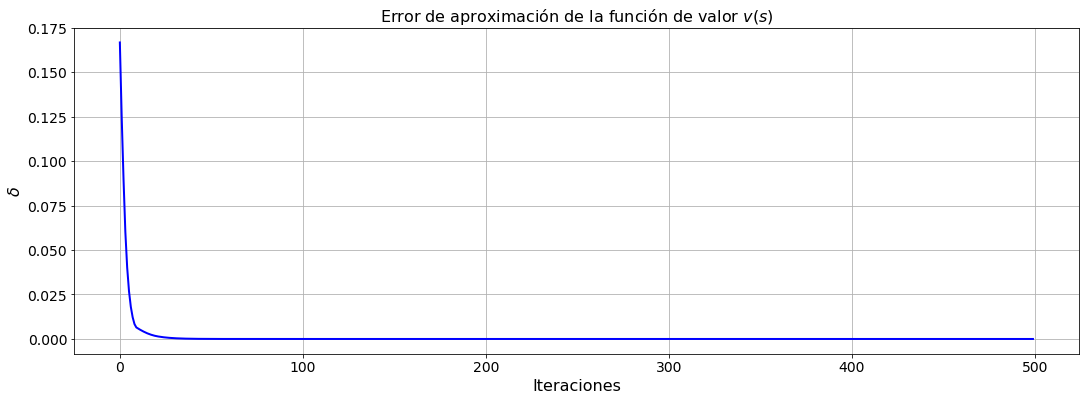

In [ ]:
plt.figure(figsize=(18,6))
plt.plot(sigmaIteration, linewidth=2, color='blue')
plt.title('Error de aproximación de la función de valor $v(s)$', fontsize = 16)
plt.xlabel('Iteraciones', fontsize = 16)
plt.ylabel(r'$\delta$', fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.grid()
plt.show()

In [ ]:
for value in values:
  print(f'Estado {value}: v(s) = {values[value]}')

Estado 1: v(s) = 0.06202559953728305
Estado 2: v(s) = 0.07029567947558746
Estado 3: v(s) = 0.07029567947558746
Estado 4: v(s) = 0.07029567947558746
Estado 5: v(s) = 0.07029567947558746
Estado 6: v(s) = 0.07029567947558746
Estado 7: v(s) = 0.062025599537283045
Estado 8: v(s) = 0.0
Estado 9: v(s) = 0.07029567947558746
Estado 10: v(s) = 0.07029567947558746
Estado 11: v(s) = 0.07029567947558746
Estado 12: v(s) = 0.07029567947558746
Estado 13: v(s) = 0
Estado 14: v(s) = -0.10567482712167166
Estado 15: v(s) = -0.1331771415684646
Estado 16: v(s) = -0.10353592841194147
Estado 17: v(s) = -0.0777609604497475
Estado 18: v(s) = -0.055347944830448345
Estado 19: v(s) = 0
Estado 20: v(s) = 0.12542954573095022
Estado 21: v(s) = 0.0
Estado 22: v(s) = 0.09407215929821264
Estado 23: v(s) = 0.09407215929821264
Estado 24: v(s) = 0.09407215929821264
Estado 25: v(s) = 0.09407215929821264
Estado 26: v(s) = 0.12542954573095022
Estado 27: v(s) = 0.12542954573095022
Estado 28: v(s) = 0.09407215929821265
Estado 2

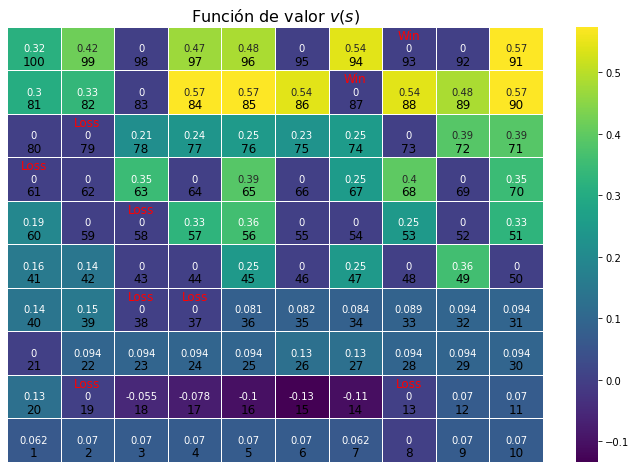

In [ ]:
matrixVs, matrixState = makeMatrixVs(values)
visualizatedMatrixVs(matrixVs, matrixState, indexRewardWin, indexRewardLoss)

In [ ]:
for value in policy:
  print(f'Estado {value}: Política = {policy[value]}')

Estado 1: Política = A
Estado 2: Política = A
Estado 3: Política = A
Estado 4: Política = A
Estado 5: Política = A
Estado 6: Política = A
Estado 7: Política = R
Estado 8: Política = Base escalera
Estado 9: Política = R
Estado 10: Política = R
Estado 11: Política = R
Estado 12: Política = R
Estado 13: Política = Estado Terminal
Estado 14: Política = R
Estado 15: Política = A
Estado 16: Política = A
Estado 17: Política = A
Estado 18: Política = A
Estado 19: Política = Estado Terminal
Estado 20: Política = A
Estado 21: Política = Base escalera
Estado 22: Política = A
Estado 23: Política = A
Estado 24: Política = A
Estado 25: Política = A
Estado 26: Política = R
Estado 27: Política = R
Estado 28: Política = R
Estado 29: Política = R
Estado 30: Política = R
Estado 31: Política = R
Estado 32: Política = R
Estado 33: Política = R
Estado 34: Política = R
Estado 35: Política = R
Estado 36: Política = R
Estado 37: Política = Estado Terminal
Estado 38: Política = Estado Terminal
Estado 39: Políti

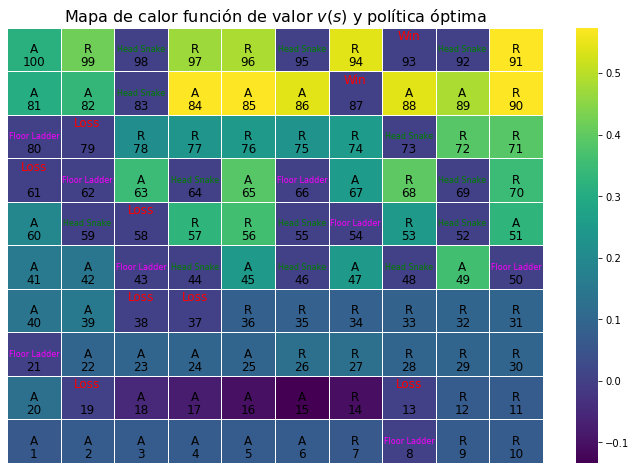

In [ ]:
visualizatedPolicy(policy, matrixVs, matrixState, indexRewardWin, indexRewardLoss, headSnakes, floorLadders)

<p align="justify">
La política lograda con $\gamma = 0.9$ para la nueva configuración del tablero es similar a la que alcanzó con $\gamma = 1$ sin embargo difieren en el estado 15, en el cual esta política sugiere avanzar y no retroceder como la anterior. Igual que en el caso anterior las acciones sugieren avanzar o retroceder para alcanzar el estado ganador y alejarse de los estados en los que se pierde. Igual que en el caso anterior los estados menos favorables se ubican en las casillas 14 a 18 y están ubicados junto a dos estados perdedores.

# Conclusiones y observaciones

<p align="justify">
1. En el mapa de calor para la visualización de las probabilidades MDP se destacan algunos aspectos graficos que evidencian los aspectos restrictivos impuestos. Por ejemplo, las probabilidades que son positivas en diferentes zonas aisladas se deben en gran parte a las escaleras y las serpientes que acaban en dichas zonas; otro ejemplo son los estados que tienen una probabilidad 0 a lo largo de todo el digrama estan ubicados en la cabeza de una serpiente o en el inicio de unas escaleras.
<p align="justify">
2. Es importante destacar que las políticas óptimas y su estimación quedan en función del valor $\gamma$, es decir la política óptima encontrada para algún $\gamma$ es óptima entre todas las políticas que se estimen para ese mismo valor de $\gamma$. Esto explica porque se encuentran políticas óptimas diferentes al cambiar el valor de $\gamma$, cada una satisface las condiciones de optimalidad pero con ese parámetro. Este aspecto dificulta la comparación entre cual política es mejor respecto al valor de $\gamma$, la interpretación no es del todo clara, sin embargo para comprar políticas óptimas distintas logradas para valores diferentes de $\gamma$ se puede recrear el juego y establecer métricas asociadas con el número de veces que gana la partida o la rapidez con la que lo hace. 
<p align="justify">
3. El algoritmo de *Value Iteration* logra encontrar la politica óptima, esto se puede ver cuando el error se disminuye a lo largo de las iteraciones, demostrandonos que el valor de $v(s)$ se esta estimandose y mejorandose al tiempo, para lograr una estimación de una política óptima despues de un número de iteraciones.
<p align="justify">
4. La politica óptima logra superar a las demas políticas, esto se puede observar en los diagramas de calor del apartado "Comparación entre Politicas" en donde se evidencia que la funcion de valor de la politica optima es mayor que la de las demas para todos los estados. Comprobando así que esta política es la mejor en comparación con la política aleatoria o la que simpre avanza, en general debe ser mejor para cualquier otra ya que es la óptima. Esta comparación tiene sentido si función de valor es evaluada respecto a otra estimada con el mismo parámetro $\gamma$.
<p align="justify">
5. Por ultimo, cabe destacar la velocidad de estabilización del algoritmo al tener cambios del tablero, en este nuevo juego se prueba con dos diferentes factores de descuento y se observó que el factor de 0,9 se estabiliza 20% mas rápido que el factor de 1.
